# Experiment 10-12


### Dataset 1:
- **Dataset:** 5m | 60º
- **Sizes:** large
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Dataset 2:
- **Dataset:** 3m | 60º
- **Sizes:** small & mid
- **Split:** 240 px
- **Tags:**  `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Model:
- **Model:** `yolov8n` *(Nano)*
- **Epochs:** 100
- **Batch:** 64
- **Freeze:** 10

### Experiments:
1. 5m large
2. 3m small/mid + 5m large
3. 3m mid + 5m large

In [ ]:
# CONFIG FOLDER PATH

# Get the project root directory (replace with your actual path)
project_root = "../../"
experiment_number = 4

# The folder you want to navigate to (relative to the root)
target_folder = f"docs/Experimentos/2 Finetuning/{experiment_number} set/runs/detect/"

### Init

In [19]:
scale: int = 500 # size for graphs (in pixels)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [21]:
# Construct the full path
target_path = os.path.join(project_root, target_folder)

# Change the current working directory
try:
    os.chdir(target_path)
    print(f"Current working directory: {os.getcwd()}")  # Verify
except FileNotFoundError:
    print(f"Error: Folder '{target_path}' not found. Check the path.")
except NotADirectoryError:
    print(f"Error: '{target_path}' is not a directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Error: Folder '../../docs/Experimentos/2 Finetuning/2 set/runs/detect/' not found. Check the path.


In [22]:
# Reset to the root path
# os.chdir(project_root)
# print(f"Current working directory: {os.getcwd()}") #Verify

#### Functions

In [ ]:
def graph_training_metrics(df: pd.DataFrame, graph: str="tight"):
    """
    Plots training and validation metrics from a training log DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing training metrics, including columns
                           'epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                           'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
                           'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
                           'metrics/mAP50-95(B)', and optionally 'lr/pg0' for the 'lr' graph.
        graph (str, optional): Type of graph to display. Options are:
            - "tight": Displays loss and metrics in a single row.
            - "full": Displays loss and metrics in two rows.
            - "lr": Displays loss, metrics, and learning rate in three rows.
            Defaults to "tight".

    Raises:
        ValueError: If the 'graph' parameter is not one of "tight", "full", or "lr".
    """
    graph = graph.lower()

    # Tight view (one row)
    if graph == "tight":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 6))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(1, 2, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(1, 2, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Full view (two rows)
    elif graph == "full":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 12))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(2, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(2, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Shows also Lr graph (three rows)
    elif graph == "lr":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 15))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(3, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(3, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()


        # Gráfico de evolución del learning rate
        plt.subplot(3, 1, 3)
        plt.plot(df["epoch"], df["lr/pg0"], label="Learning Rate (pg0)", color="cadetblue", marker='.', linestyle='-')
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Evolution")
        plt.grid(True)

    else:
        raise ValueError(f"Invalid graph parameter: '{graph}'. Must be one of 'tight', 'full', or 'lr'.")

    plt.tight_layout()
    plt.show()

In [ ]:
def graph_LrLoss(df):
    """Generates a 3D plot of Learning Rate vs. Loss vs. Epoch."""

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Data
    epochs = df['epoch']
    losses = df['val/cls_loss']  # or df['train/cls_loss'], or combined as needed.
    lrs = df['lr/pg0']

    # Scatter plot
    ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis', marker='o')

    # Labels
    ax.set_xlabel('Learning Rate (lr/pg0)')
    ax.set_ylabel('Classification Loss (val/cls_loss)')
    ax.set_zlabel('Epoch')
    ax.set_title('3D Plot: Learning Rate vs. Loss vs. Epoch')

    # Color bar
    fig.colorbar(ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis'), label='Loss Value')

    plt.show()

In [ ]:
def graph_LrLoss_3D(df, set: str='val'):
    """Generates an interactive 3D plot of Learning Rate vs. Loss vs. Epoch."""

    if set.lower() == 'val':
        print("Validation set")
        loss_set = 'val/cls_loss'
        title_set = 'Validation'
    elif set.lower() == 'train':
        print("Training set")
        loss_set = 'train/cls_loss'
        title_set = 'Train'
    else:
        print("Debe indicarse el set de entrenamiento: set debe ser igual 'val' o 'train'")
        return  

    fig = go.Figure(data=[go.Scatter3d(
        x=df['lr/pg0'],
        y=df[loss_set],
        z=df['epoch'],
        mode='markers',
        marker=dict(
            size=5,
            color=df[loss_set], # color based on loss value
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title='Loss Value')  # Add colorbar
        )
    )])

    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis=dict(title='Learning Rate (lr/pg0)'),
            yaxis=dict(title=f'Classification Loss ({loss_set})'),
            zaxis=dict(title='Epoch'),
        ),
        title=f'Learning Rate vs. {title_set} Loss vs. Epoch'
    )

    fig.show()

----

# Experimentos

## Experiment 10 *(full dataset)*
### *5m | 60º | large*

In [26]:
folder = "train/"

In [27]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df1 = pd.read_csv(file_path)
df1.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,675.534,1.83843,1.33453,1.37074,0.41209,0.33924,0.29084,0.09404,2.61510,1.77982,1.67887,0.000119,0.000119,0.000119
96,97,682.871,1.81782,1.32551,1.34566,0.42720,0.33940,0.29832,0.09662,2.59056,1.77491,1.66405,0.000099,0.000099,0.000099
97,98,688.807,1.79991,1.32942,1.35591,0.41389,0.33411,0.28886,0.09318,2.62092,1.78625,1.68176,0.000079,0.000079,0.000079
98,99,696.119,1.81299,1.31321,1.34892,0.42446,0.33613,0.29413,0.09500,2.60383,1.77663,1.66463,0.000060,0.000060,0.000060
99,100,702.098,1.80786,1.29337,1.33602,0.42700,0.33985,0.29699,0.09578,2.59915,1.77664,1.66437,0.000040,0.000040,0.000040


***NOTE:***
- `lr/pg0` typically refers to the learning rate for the backbone weights.
- `lr/pg1` is usually associated with the learning rate for the YOLO layers' weights.
- `lr/pg2` often represents the learning rate for any additional parameters, such as biases.

In [ ]:
last_row = df1.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 702.098 sec


### Graphs

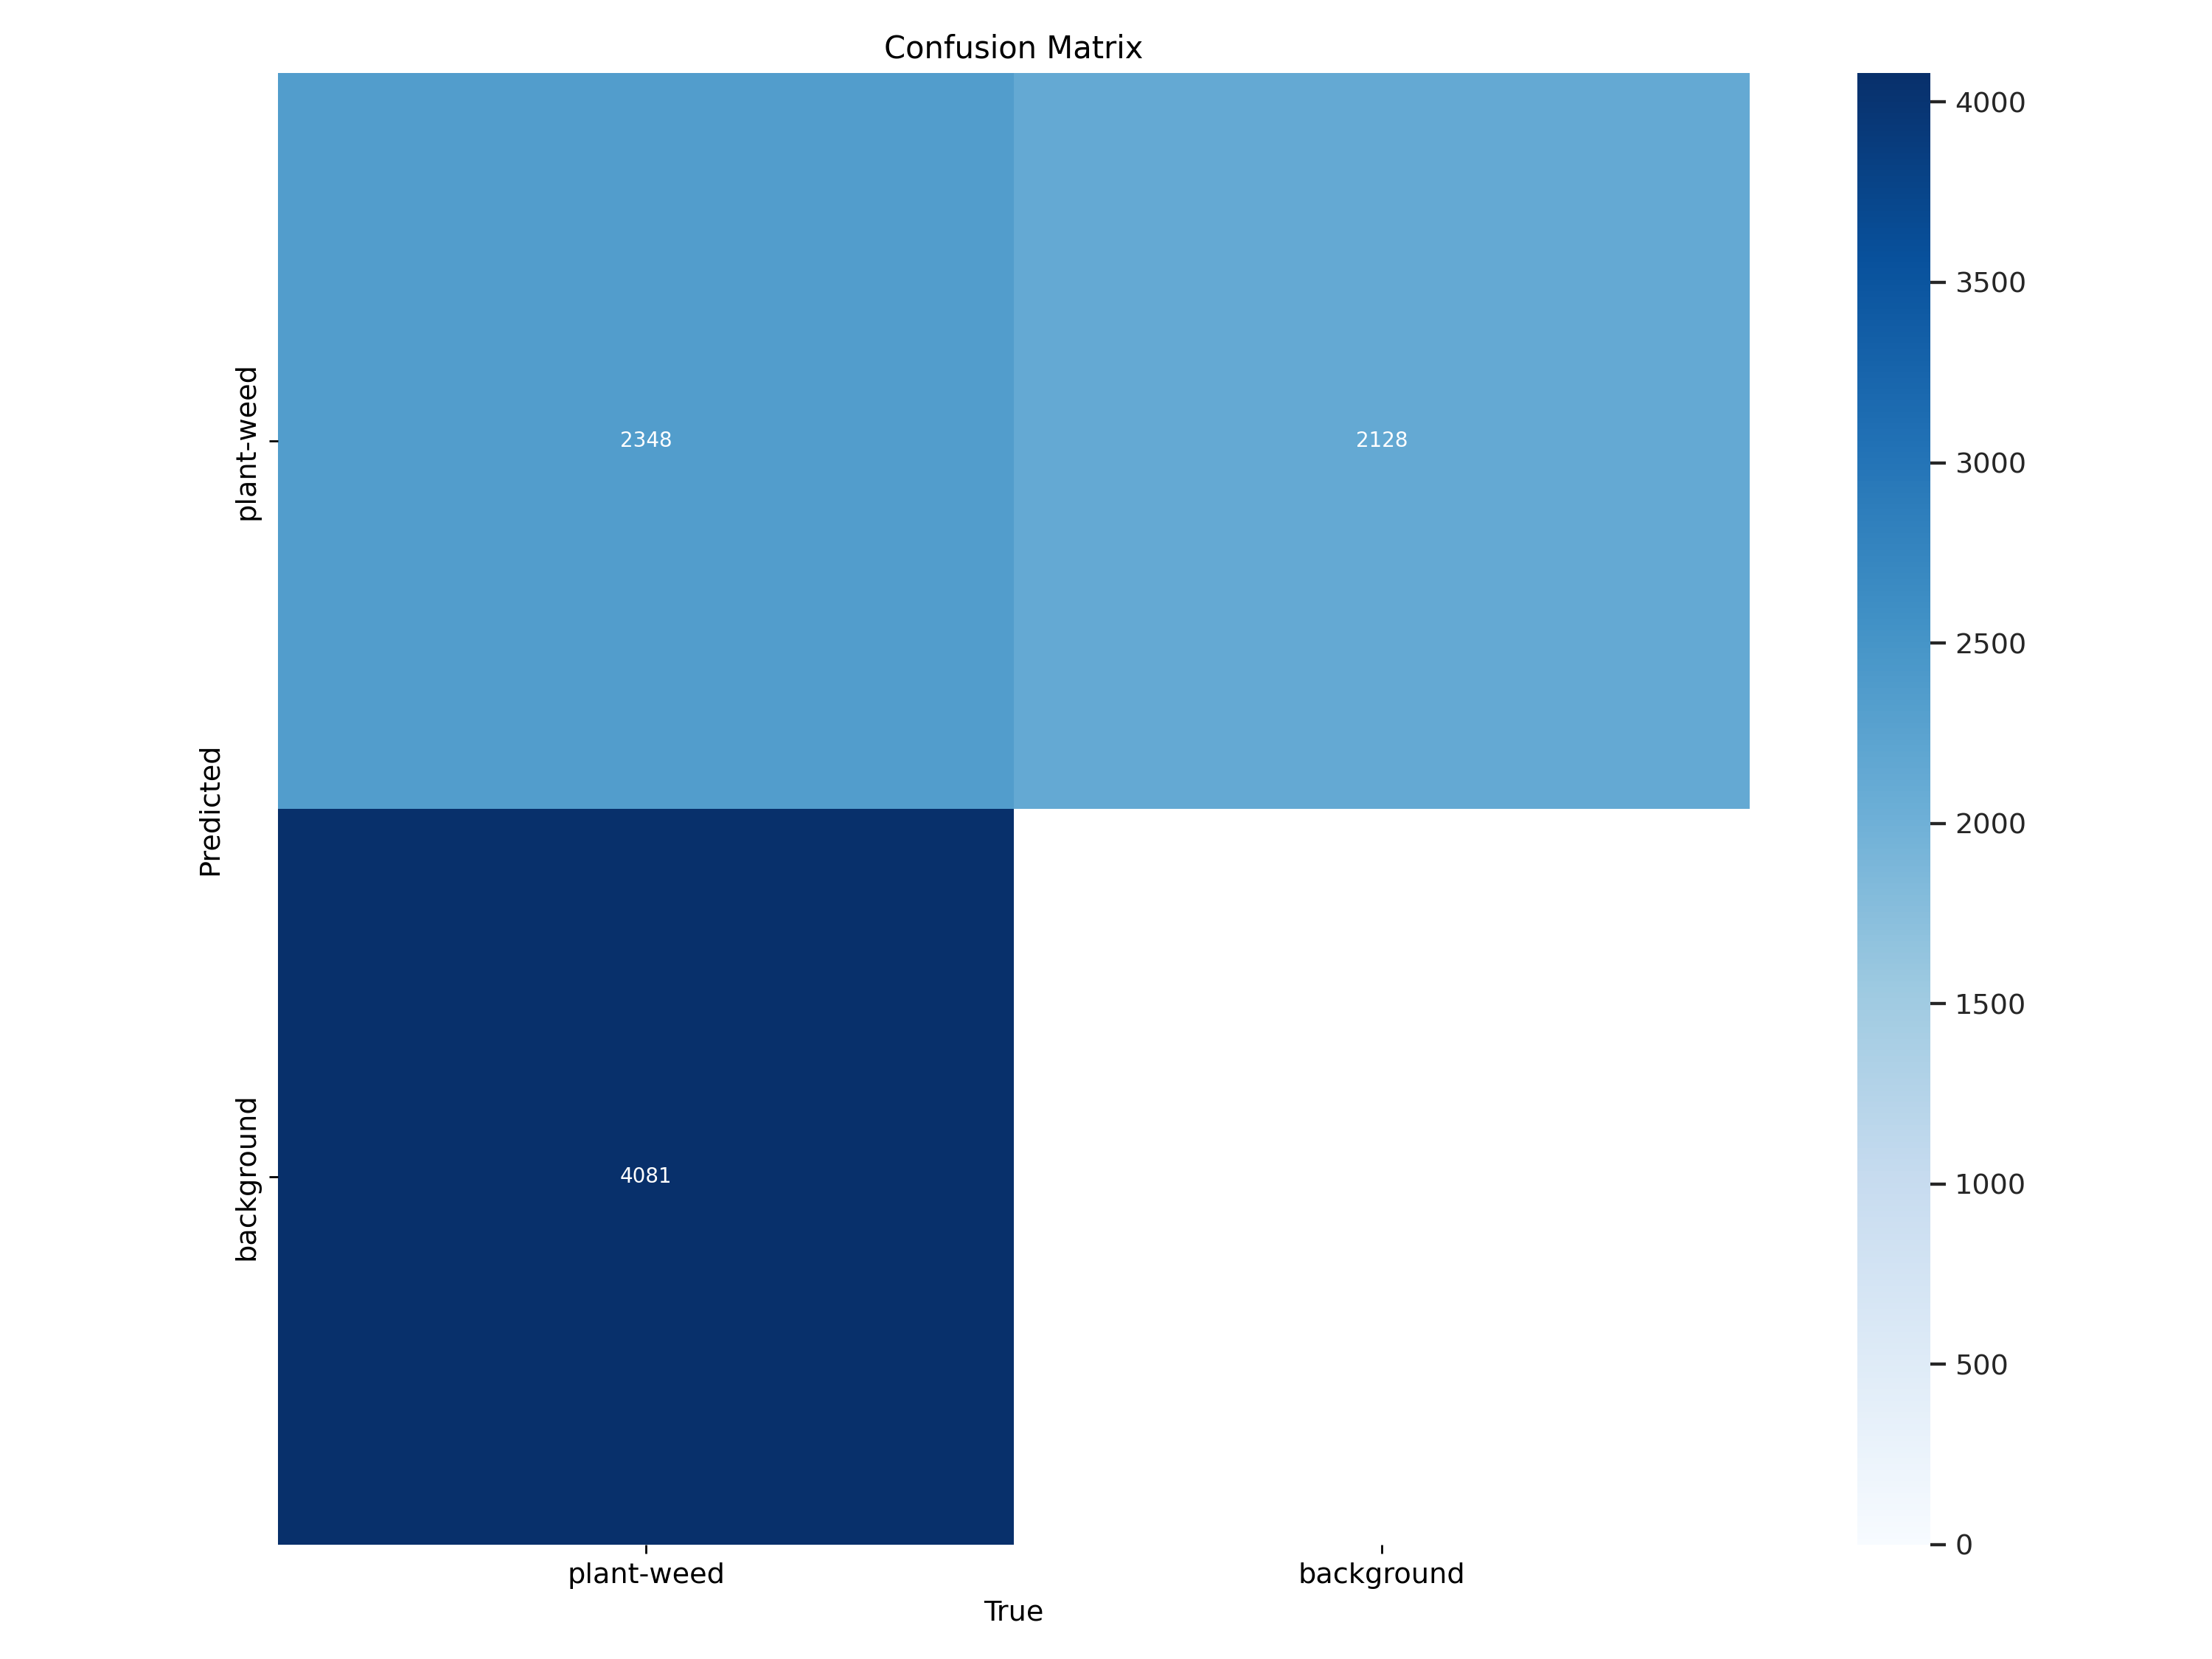

In [29]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

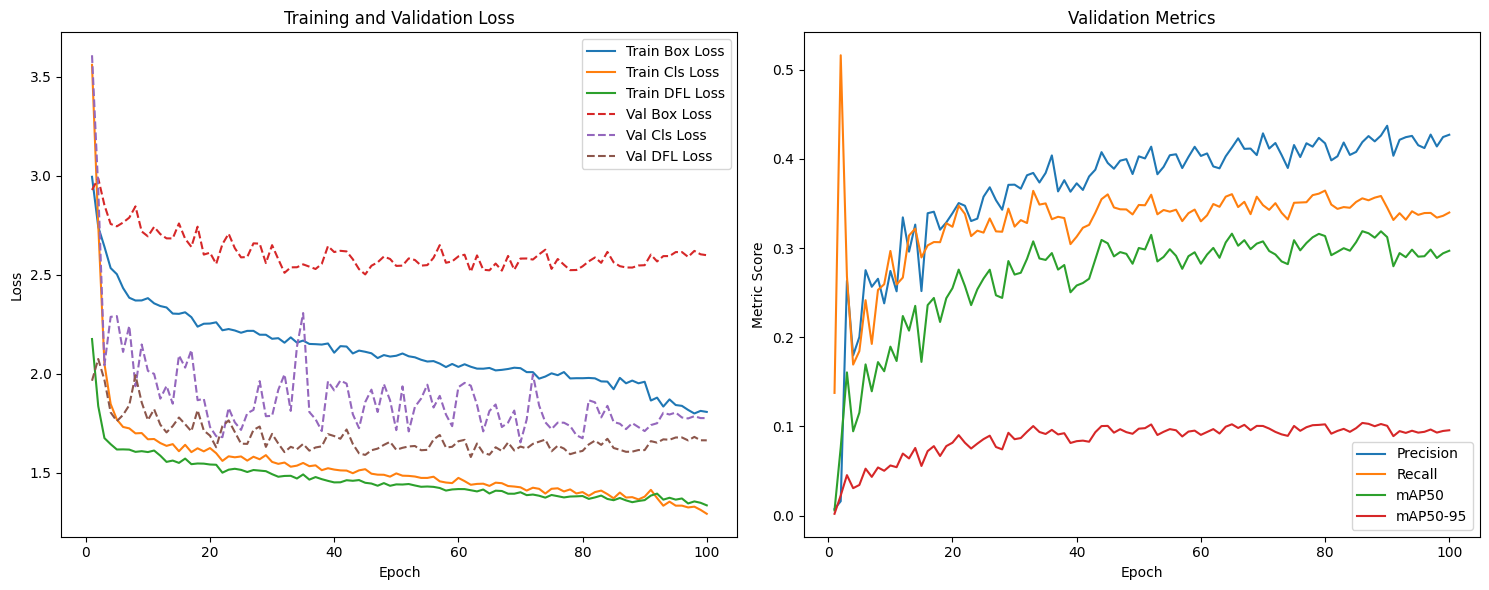

In [ ]:
graph_training_metrics(df1, graph="full")

In [31]:
graph_LrLoss_3D(df1)

Validation set


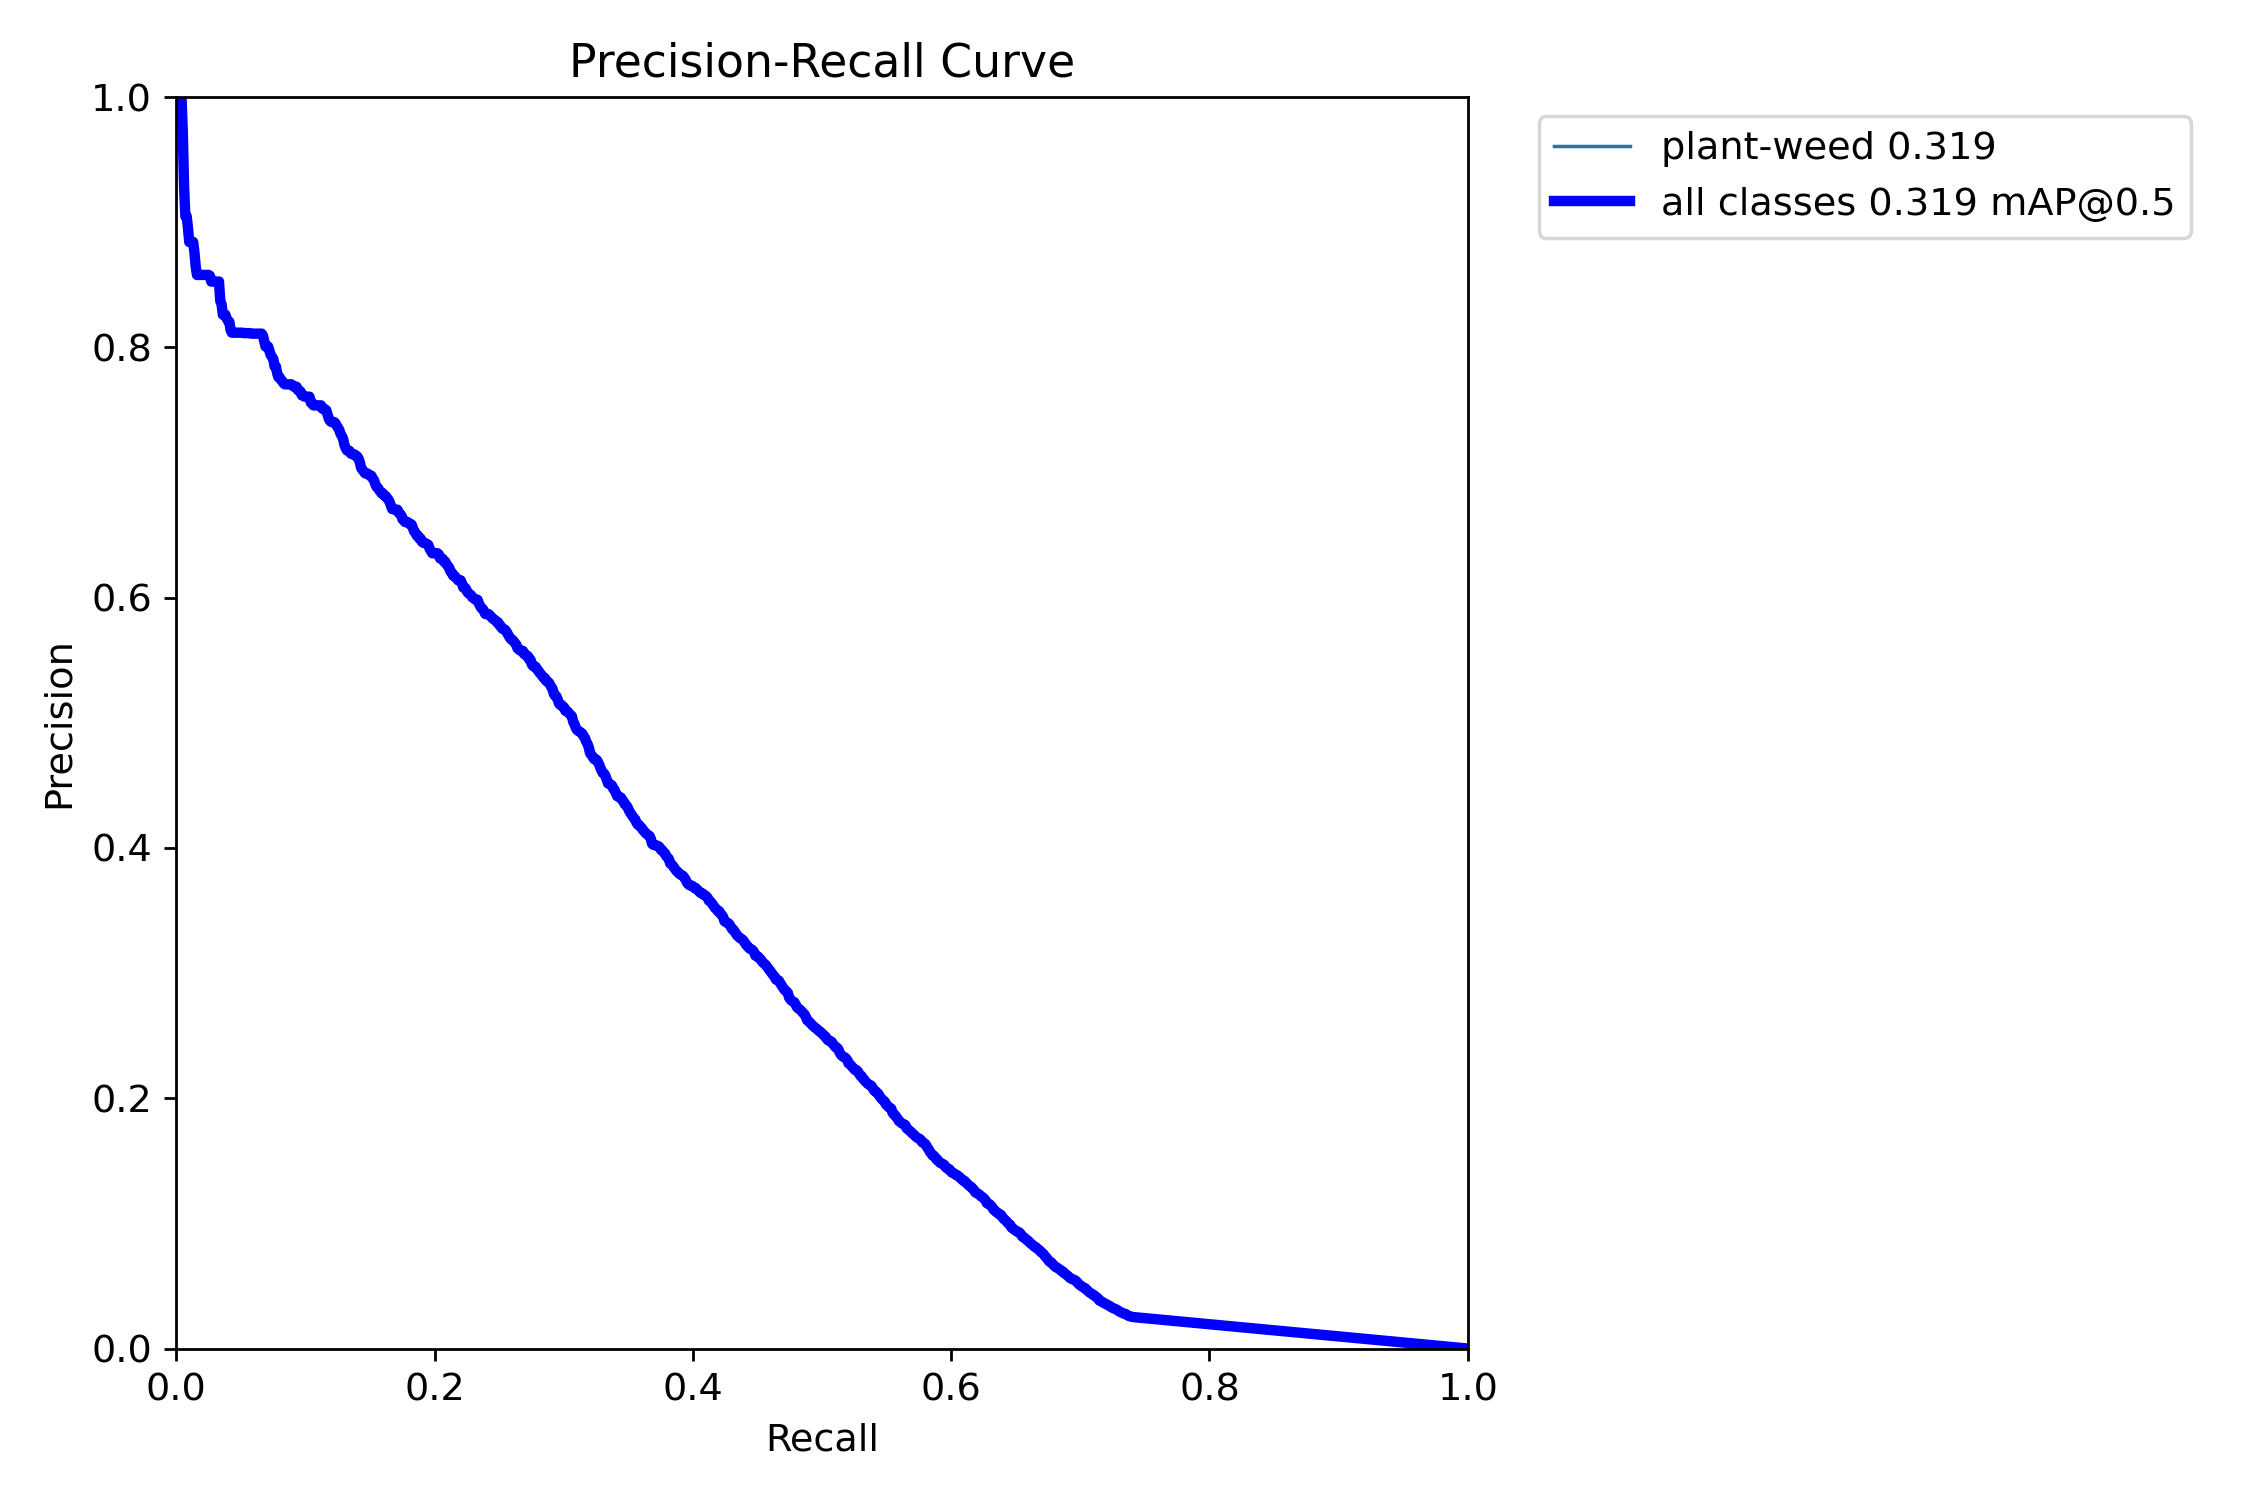

In [32]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

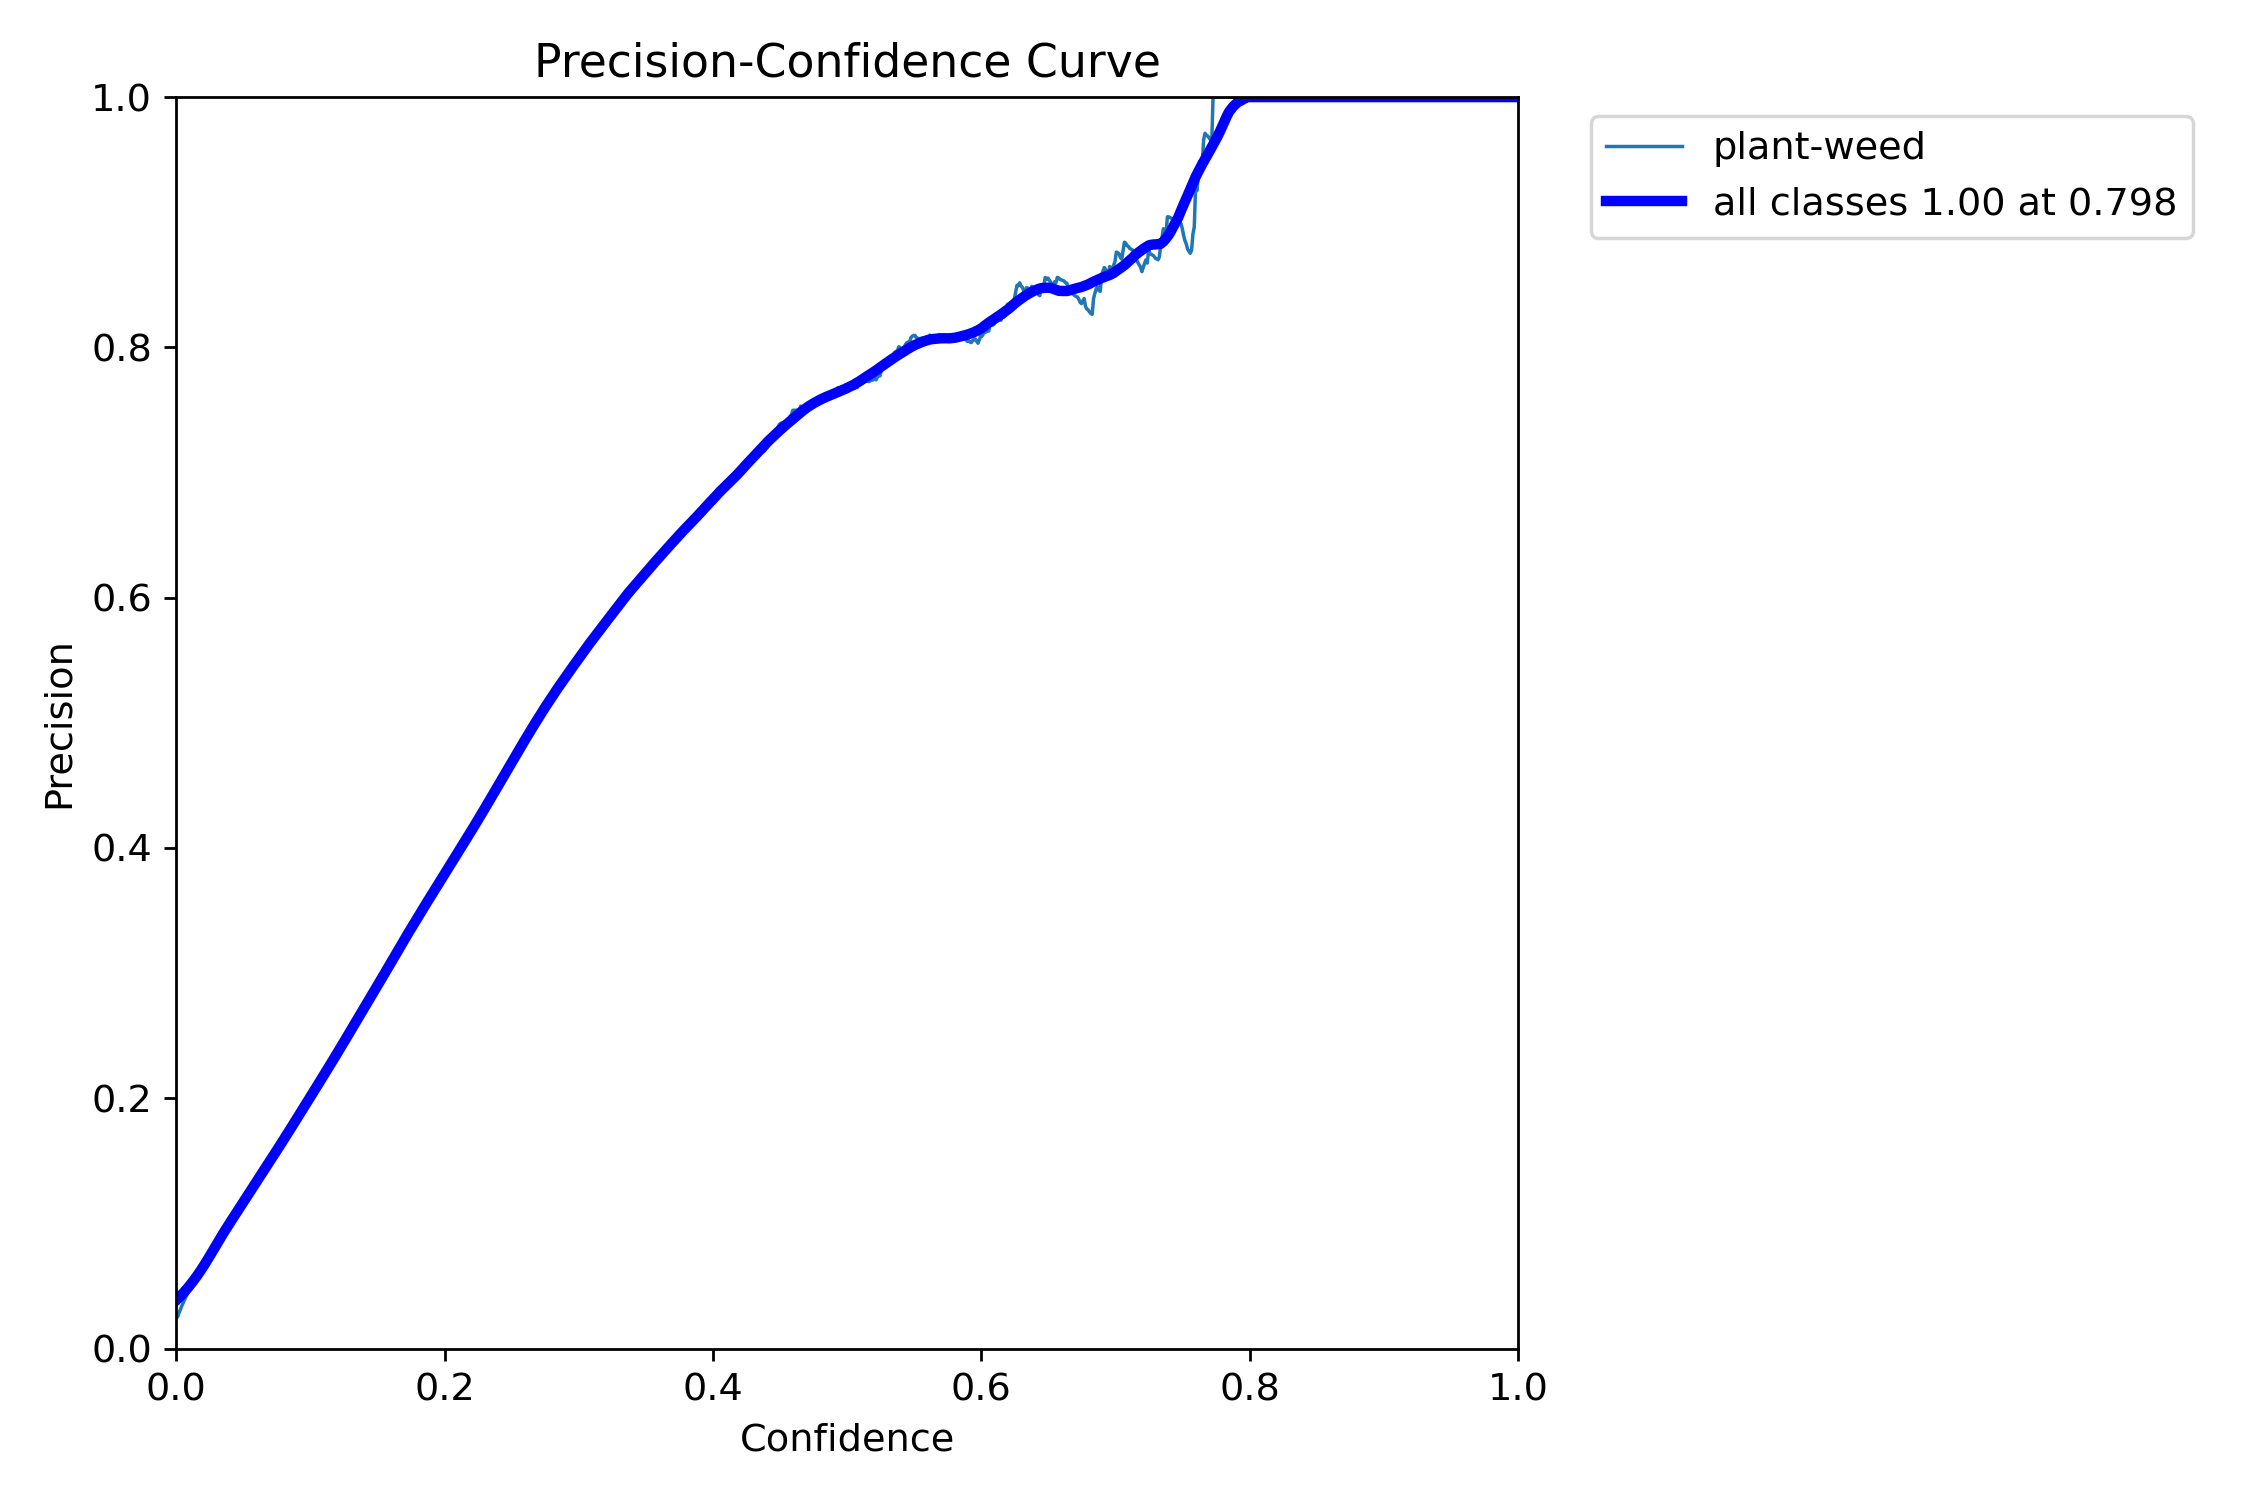

In [33]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

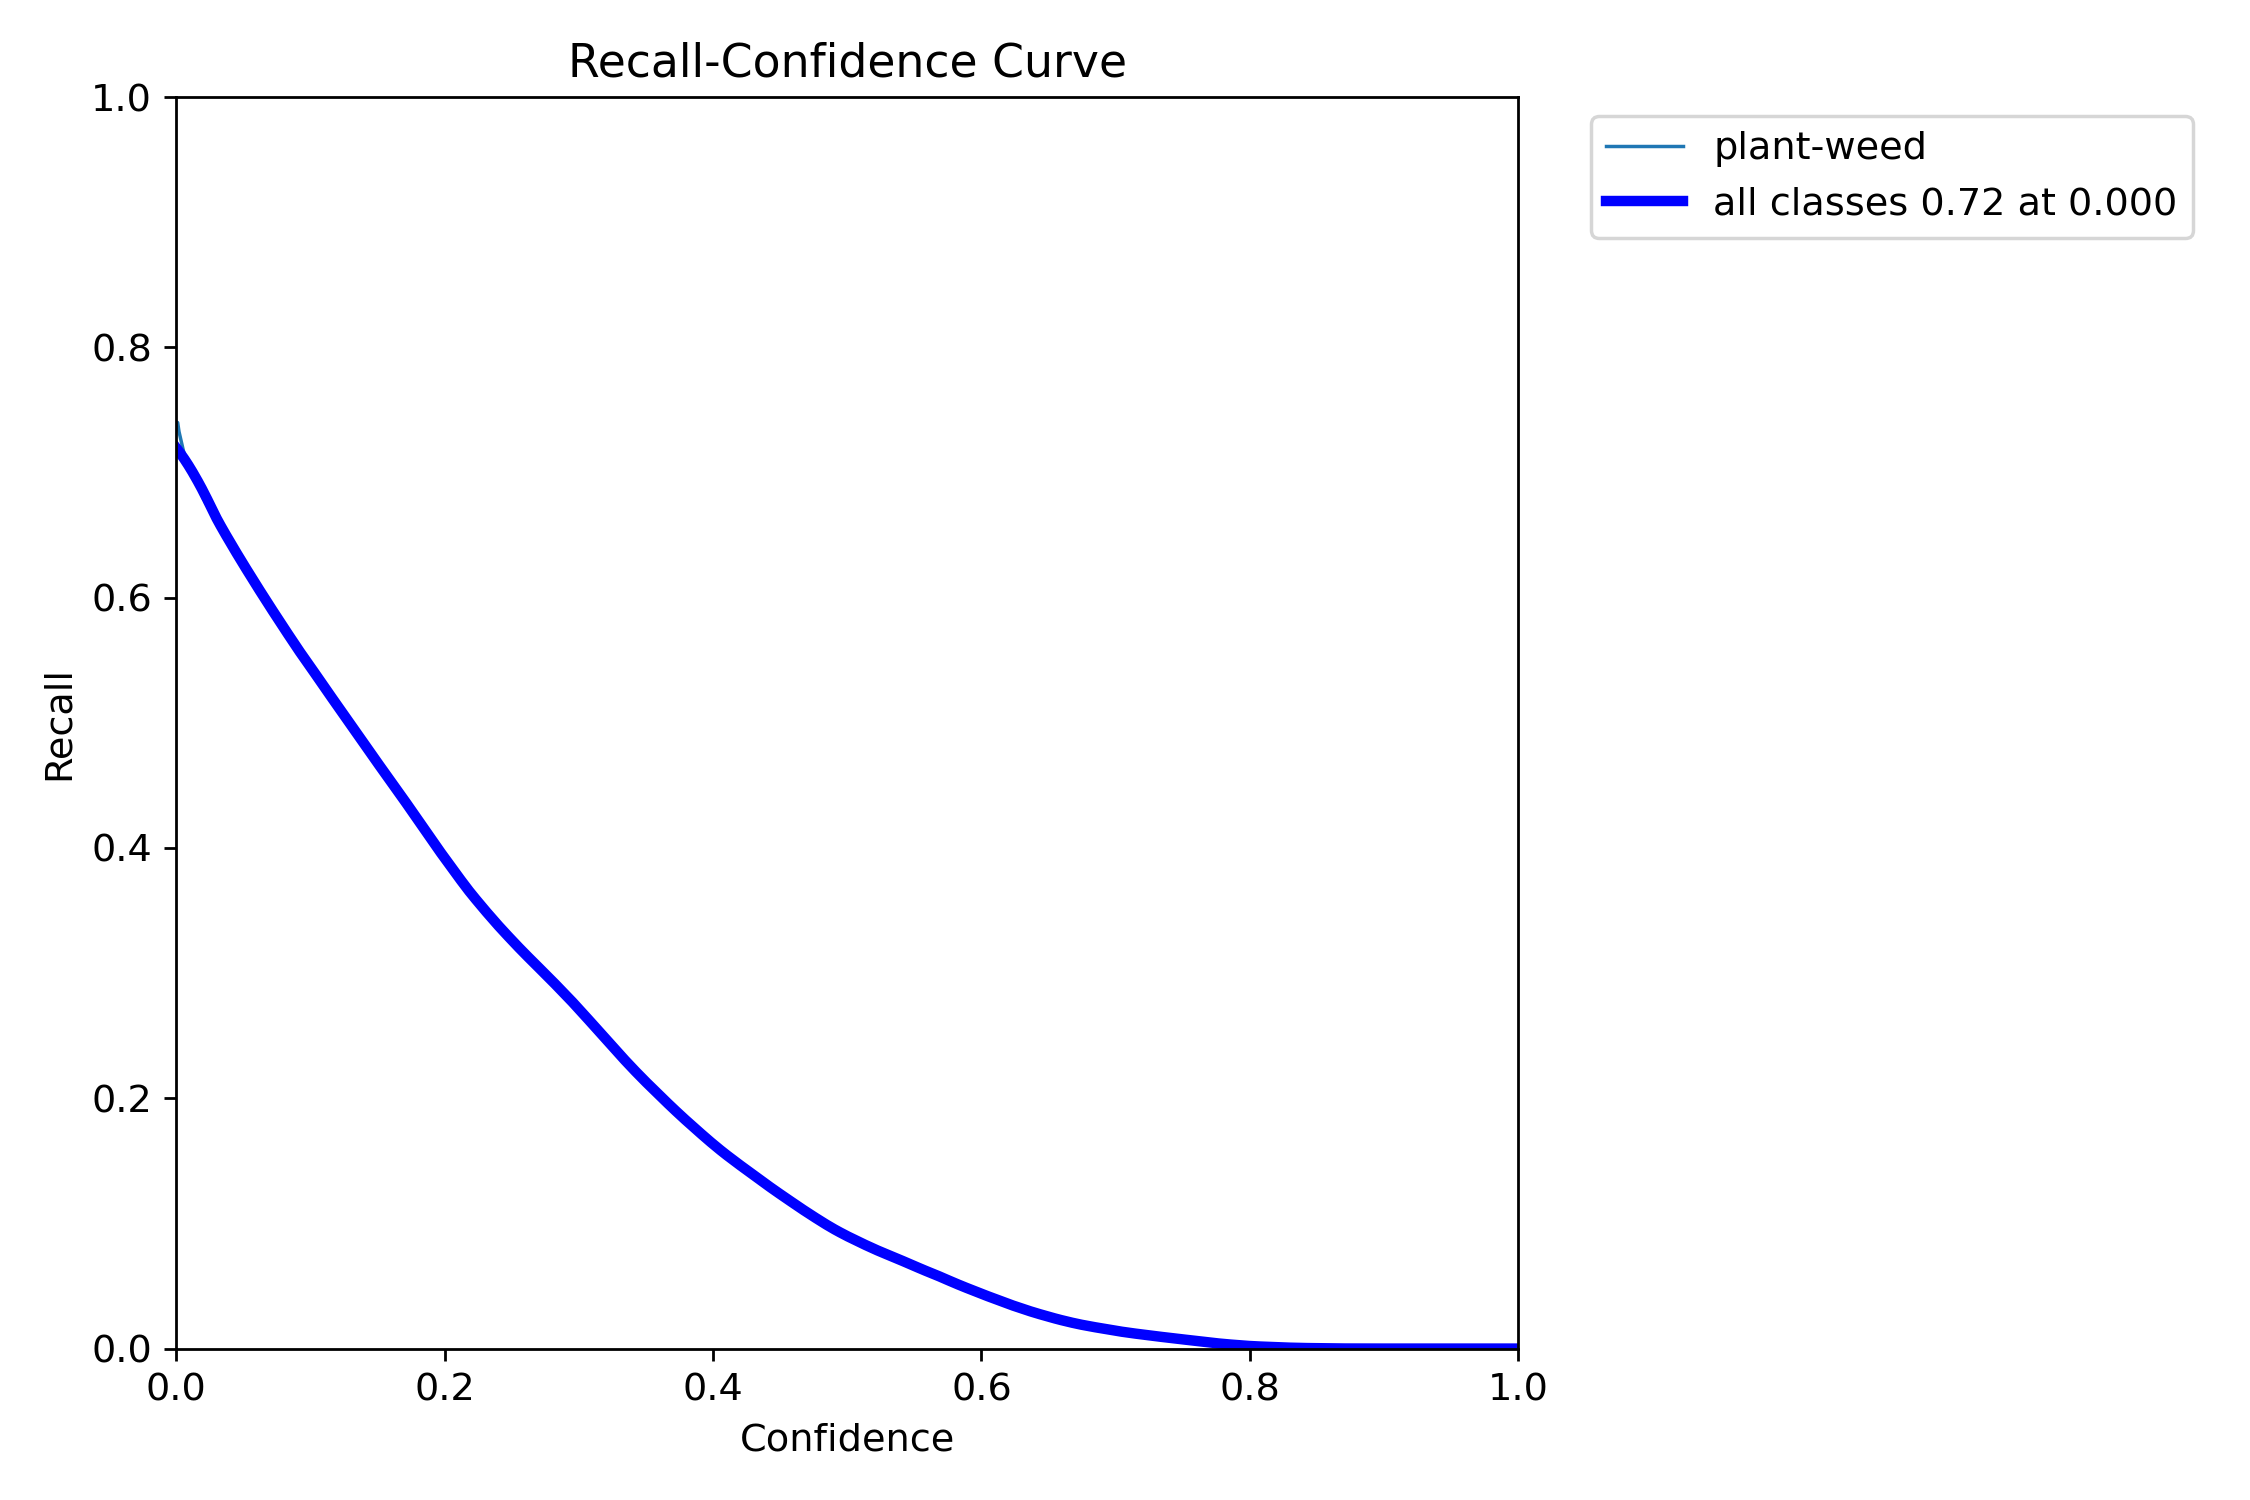

In [34]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

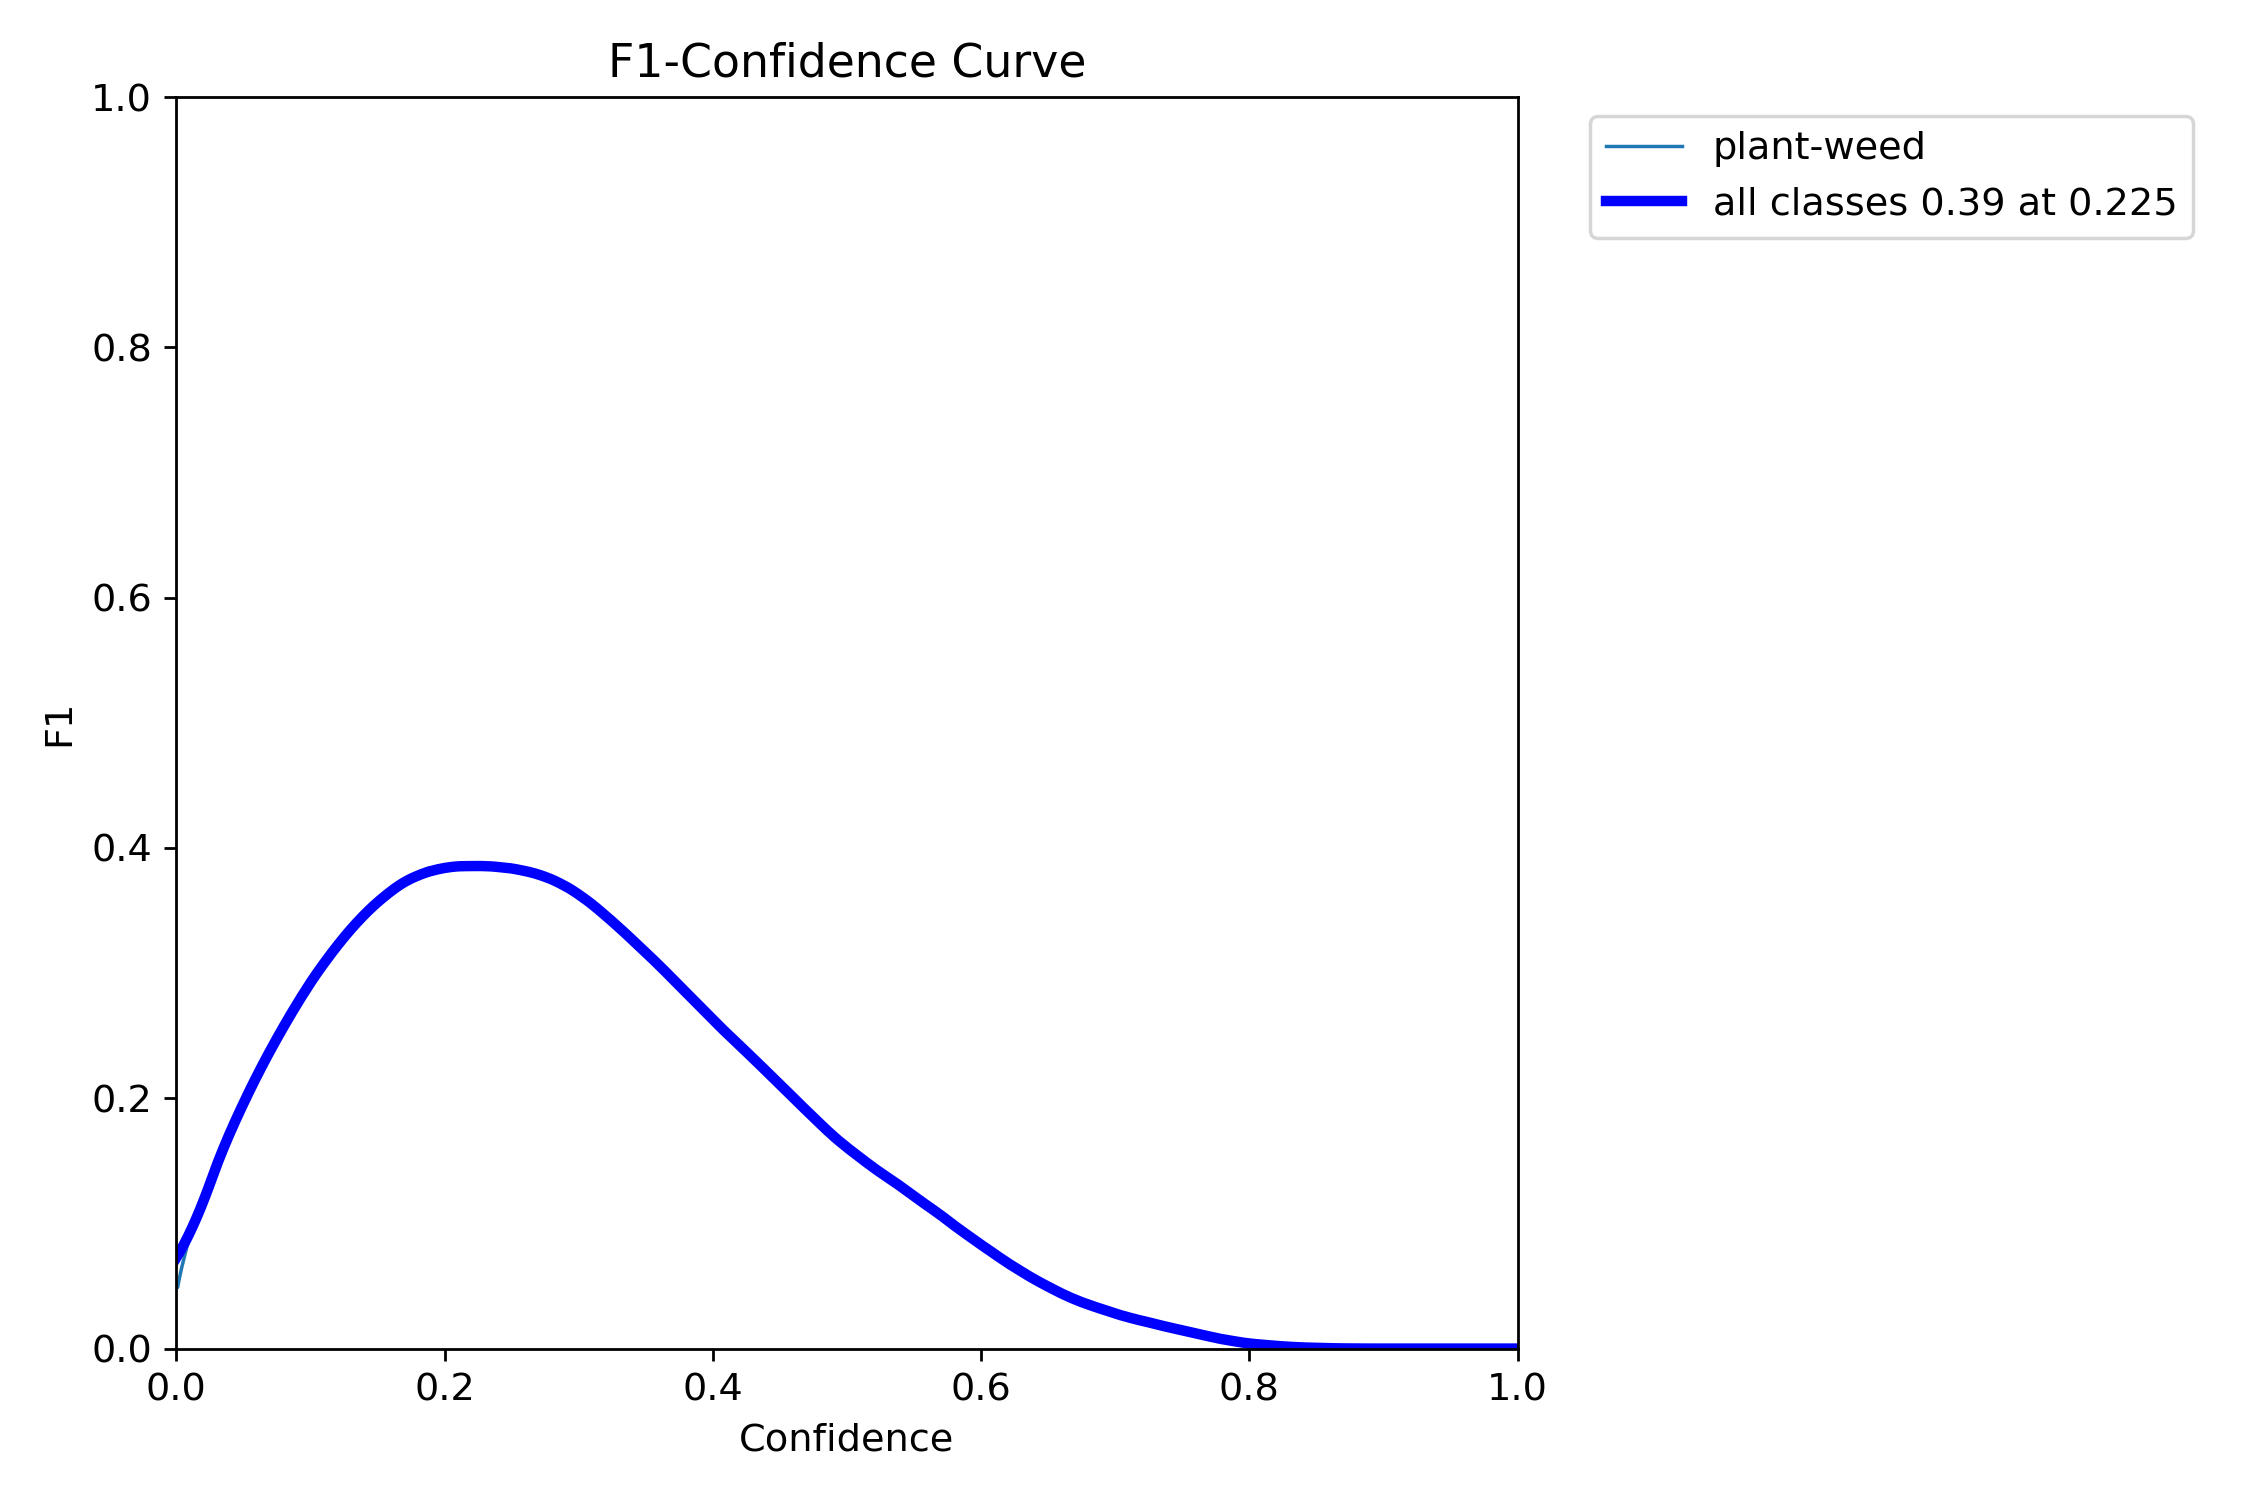

In [35]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

El valor de confianza que optimiza la precisión y recall es 0.231. En la mayoría de los casos, una mayor confianza es deseable.

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

## Experiment 11 *(full dataset)*
### *3.5m + 5m | 60º | small + mid + large*

In [36]:
folder = "train2/"

In [37]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df2 = pd.read_csv(file_path)
df2.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,360.341,1.76656,1.27556,1.33661,0.33850,0.30638,0.21604,0.05936,2.78132,2.04146,1.62064,0.000119,0.000119,0.000119
96,97,363.470,1.74257,1.24931,1.31357,0.33448,0.29607,0.21000,0.05658,2.80701,2.04054,1.63403,0.000099,0.000099,0.000099
97,98,366.616,1.78616,1.25406,1.32971,0.33708,0.30901,0.21508,0.05900,2.78923,2.03379,1.61732,0.000079,0.000079,0.000079
98,99,369.700,1.80088,1.26535,1.32537,0.34492,0.31225,0.21911,0.06076,2.77873,2.03002,1.60795,0.000060,0.000060,0.000060
99,100,374.147,1.75346,1.23725,1.31018,0.34166,0.30966,0.21831,0.06050,2.77632,2.03878,1.60498,0.000040,0.000040,0.000040


In [ ]:
last_row = df2.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 374.147 sec


### Graphs

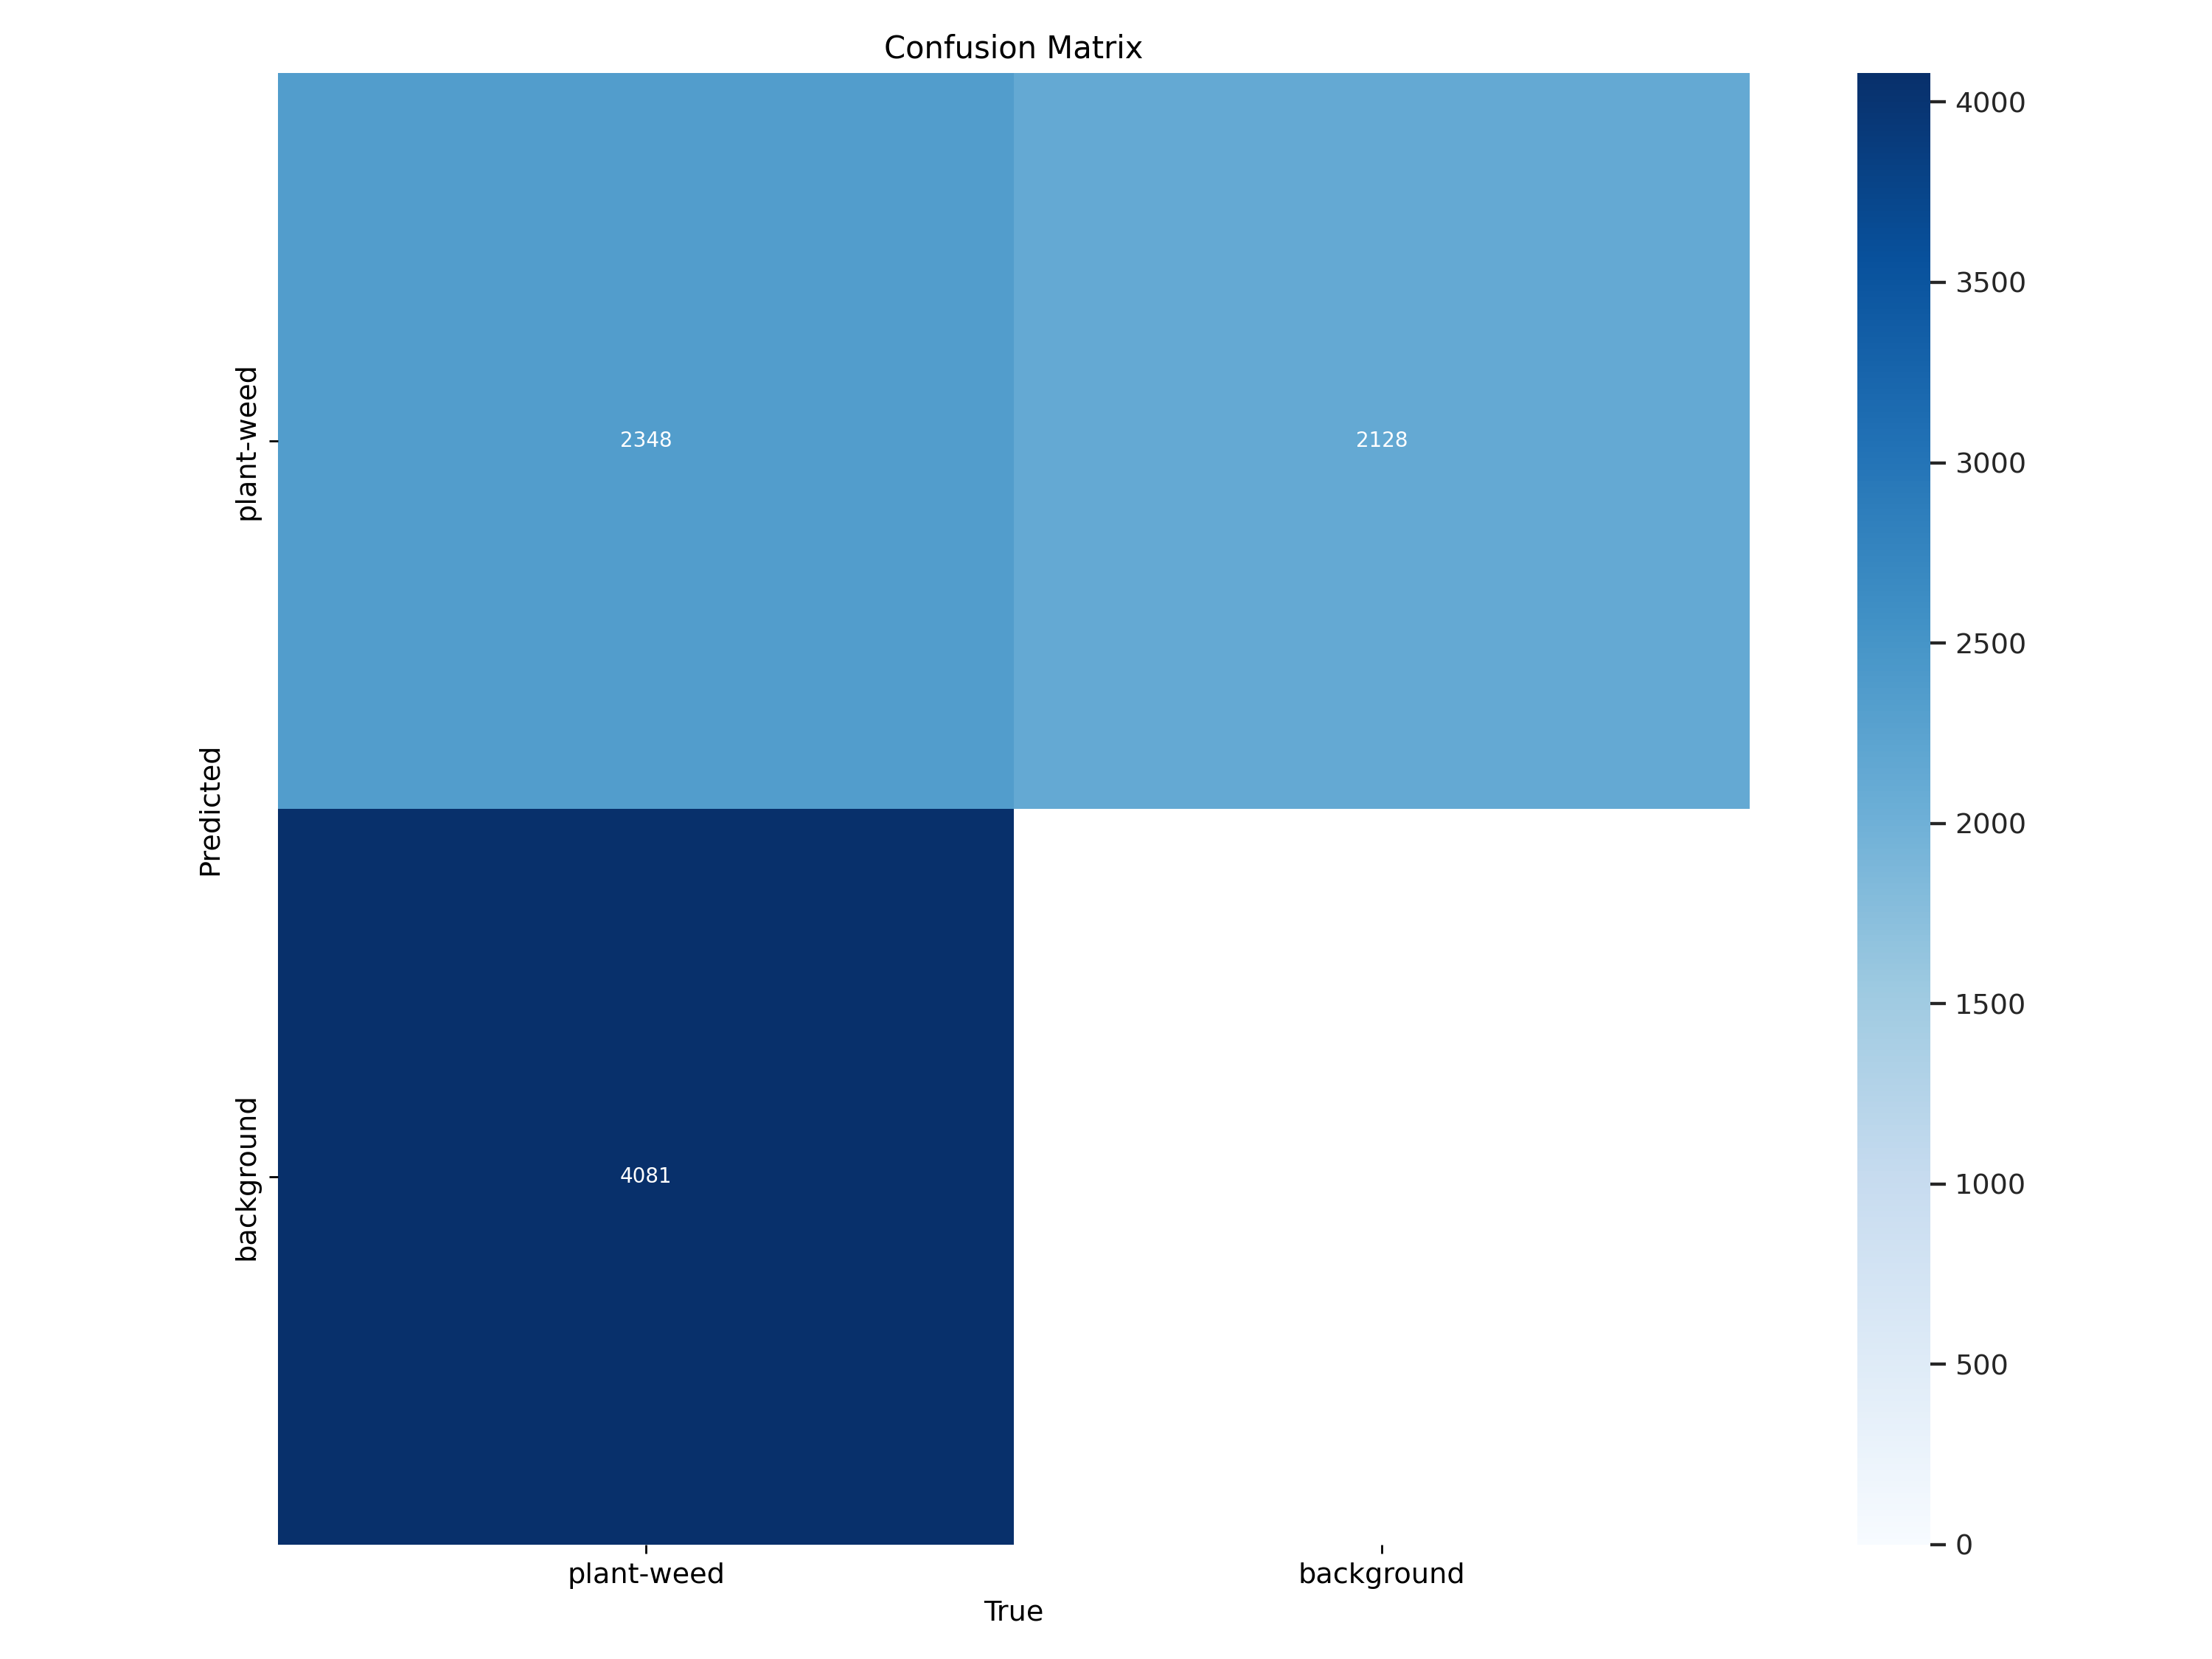

In [ ]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

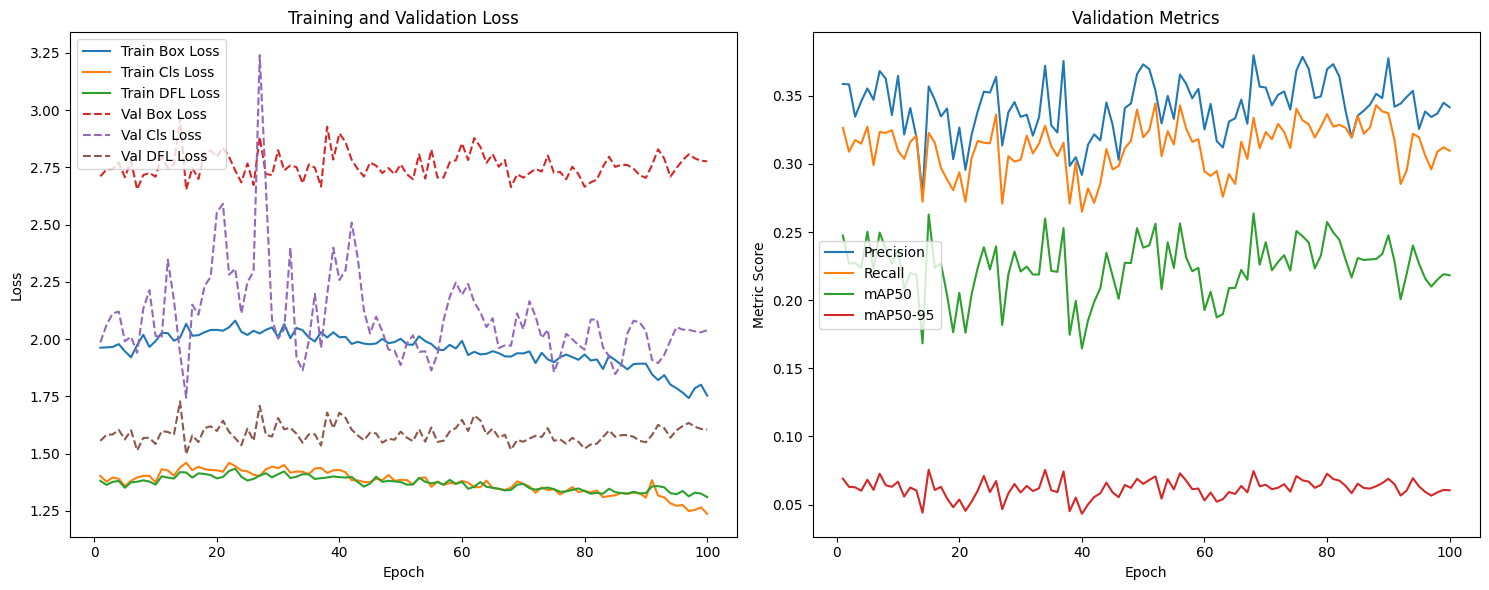

In [ ]:
graph_training_metrics(df2, graph="full")

In [40]:
graph_LrLoss_3D(df2)

Validation set


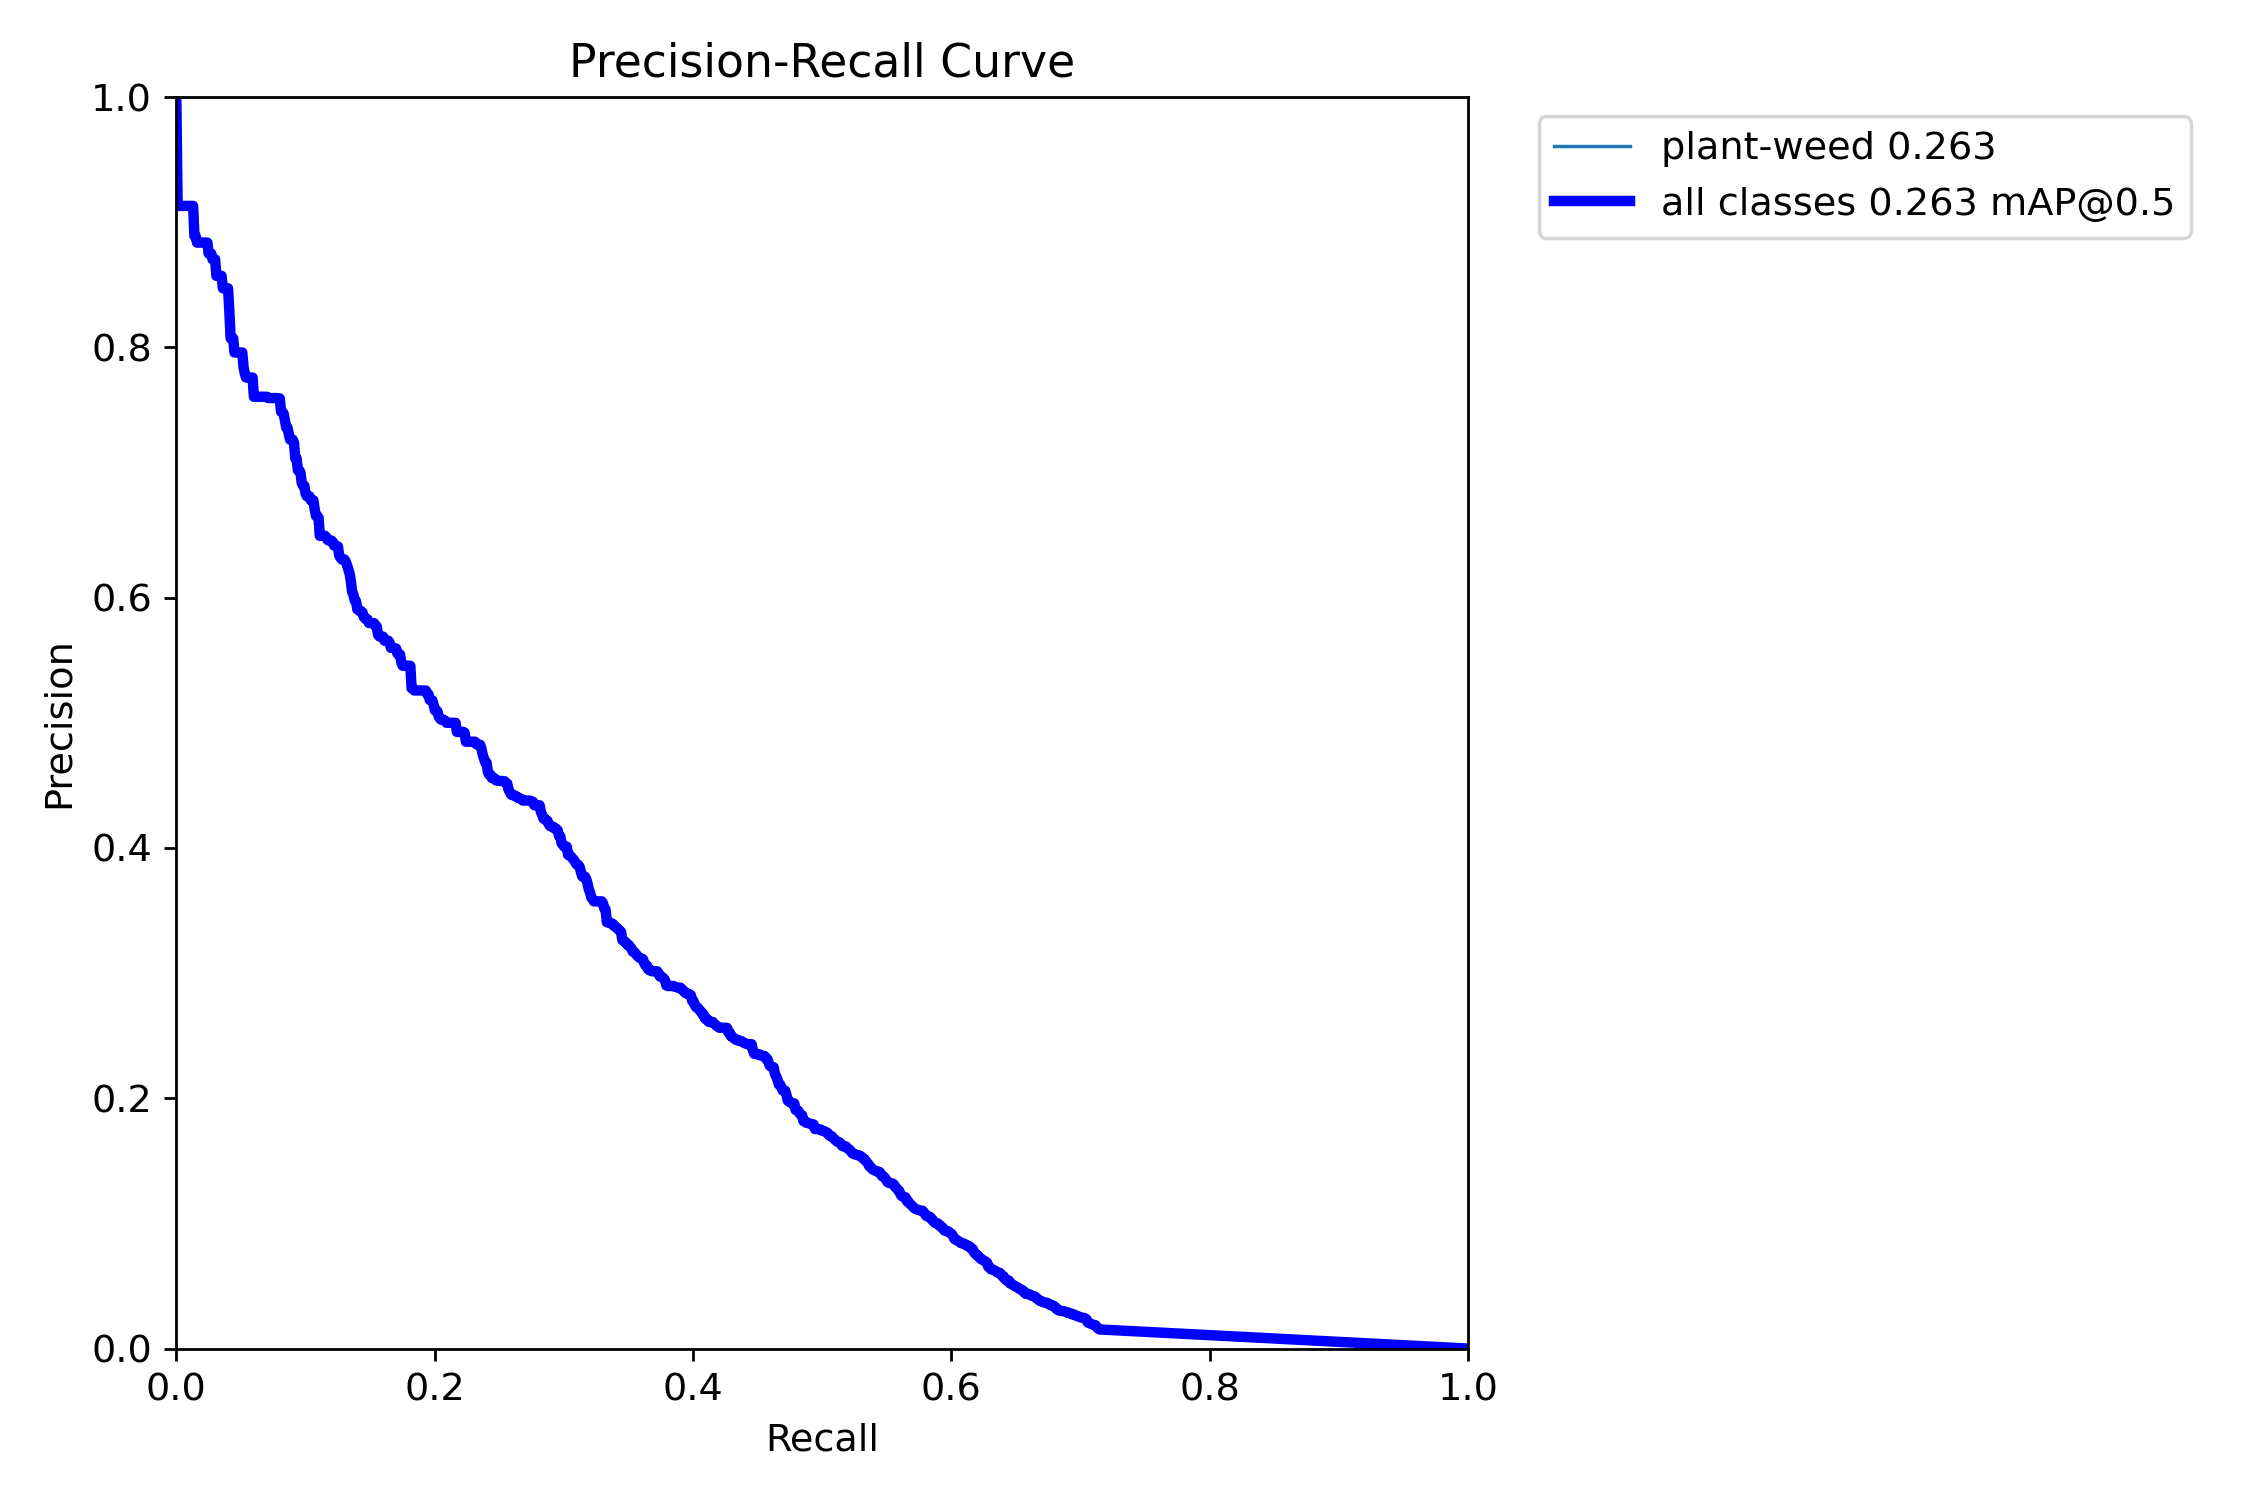

In [41]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

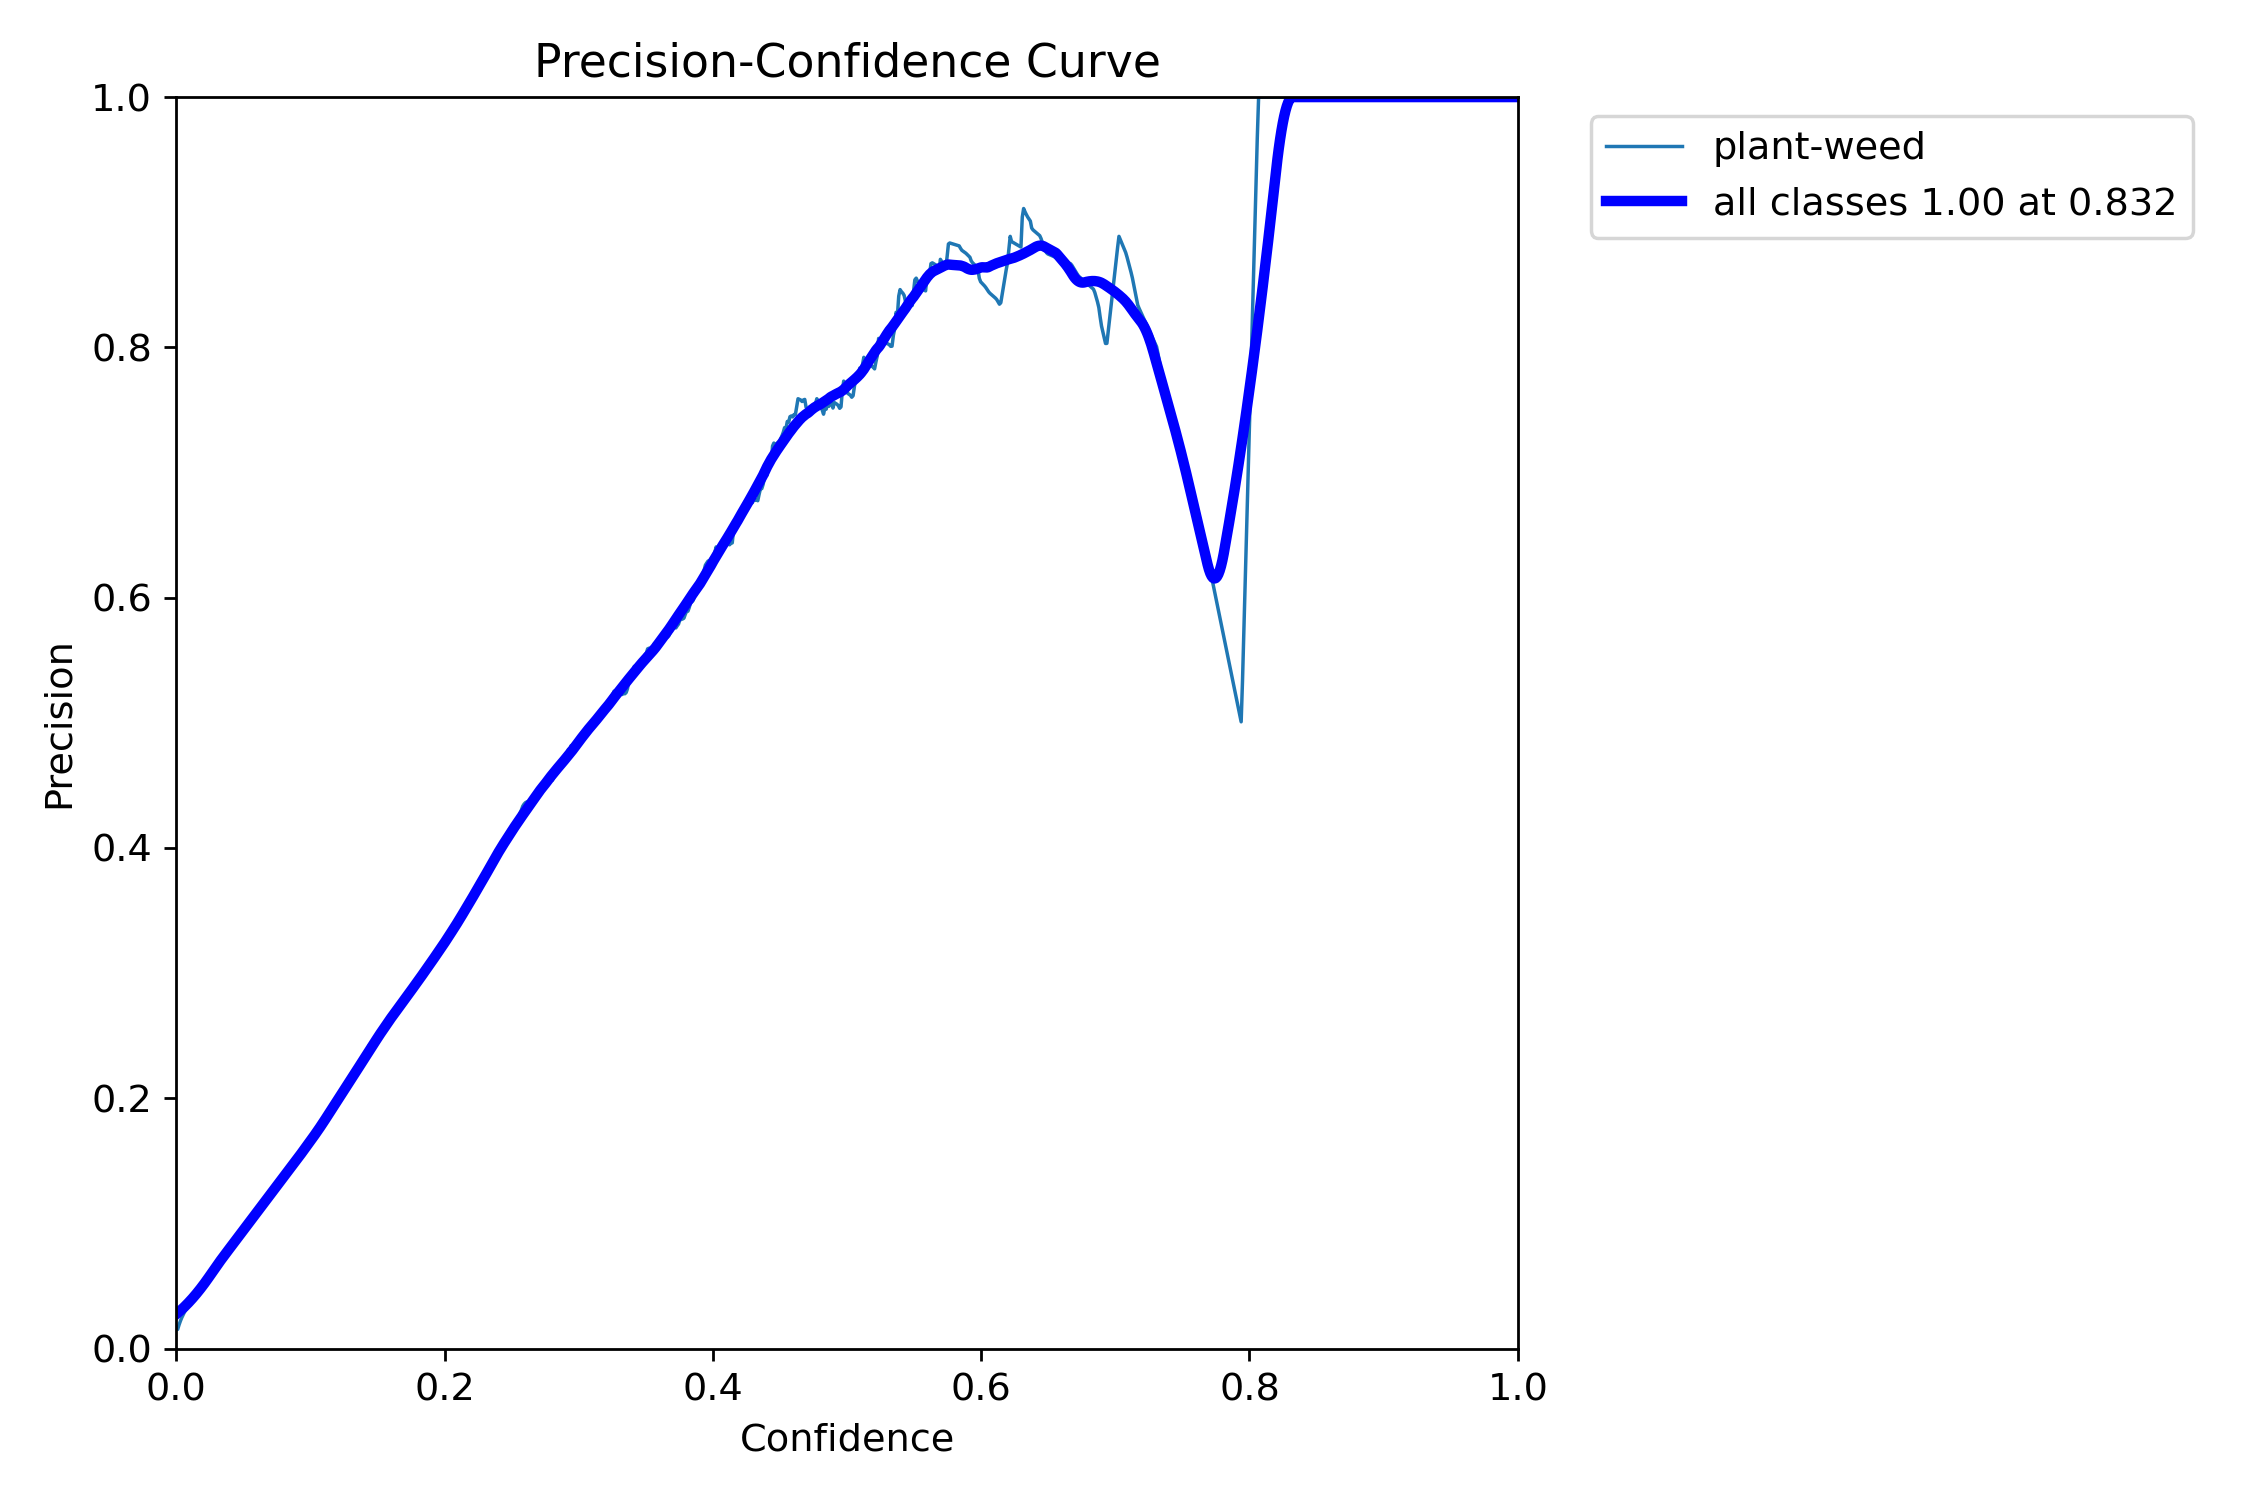

In [42]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

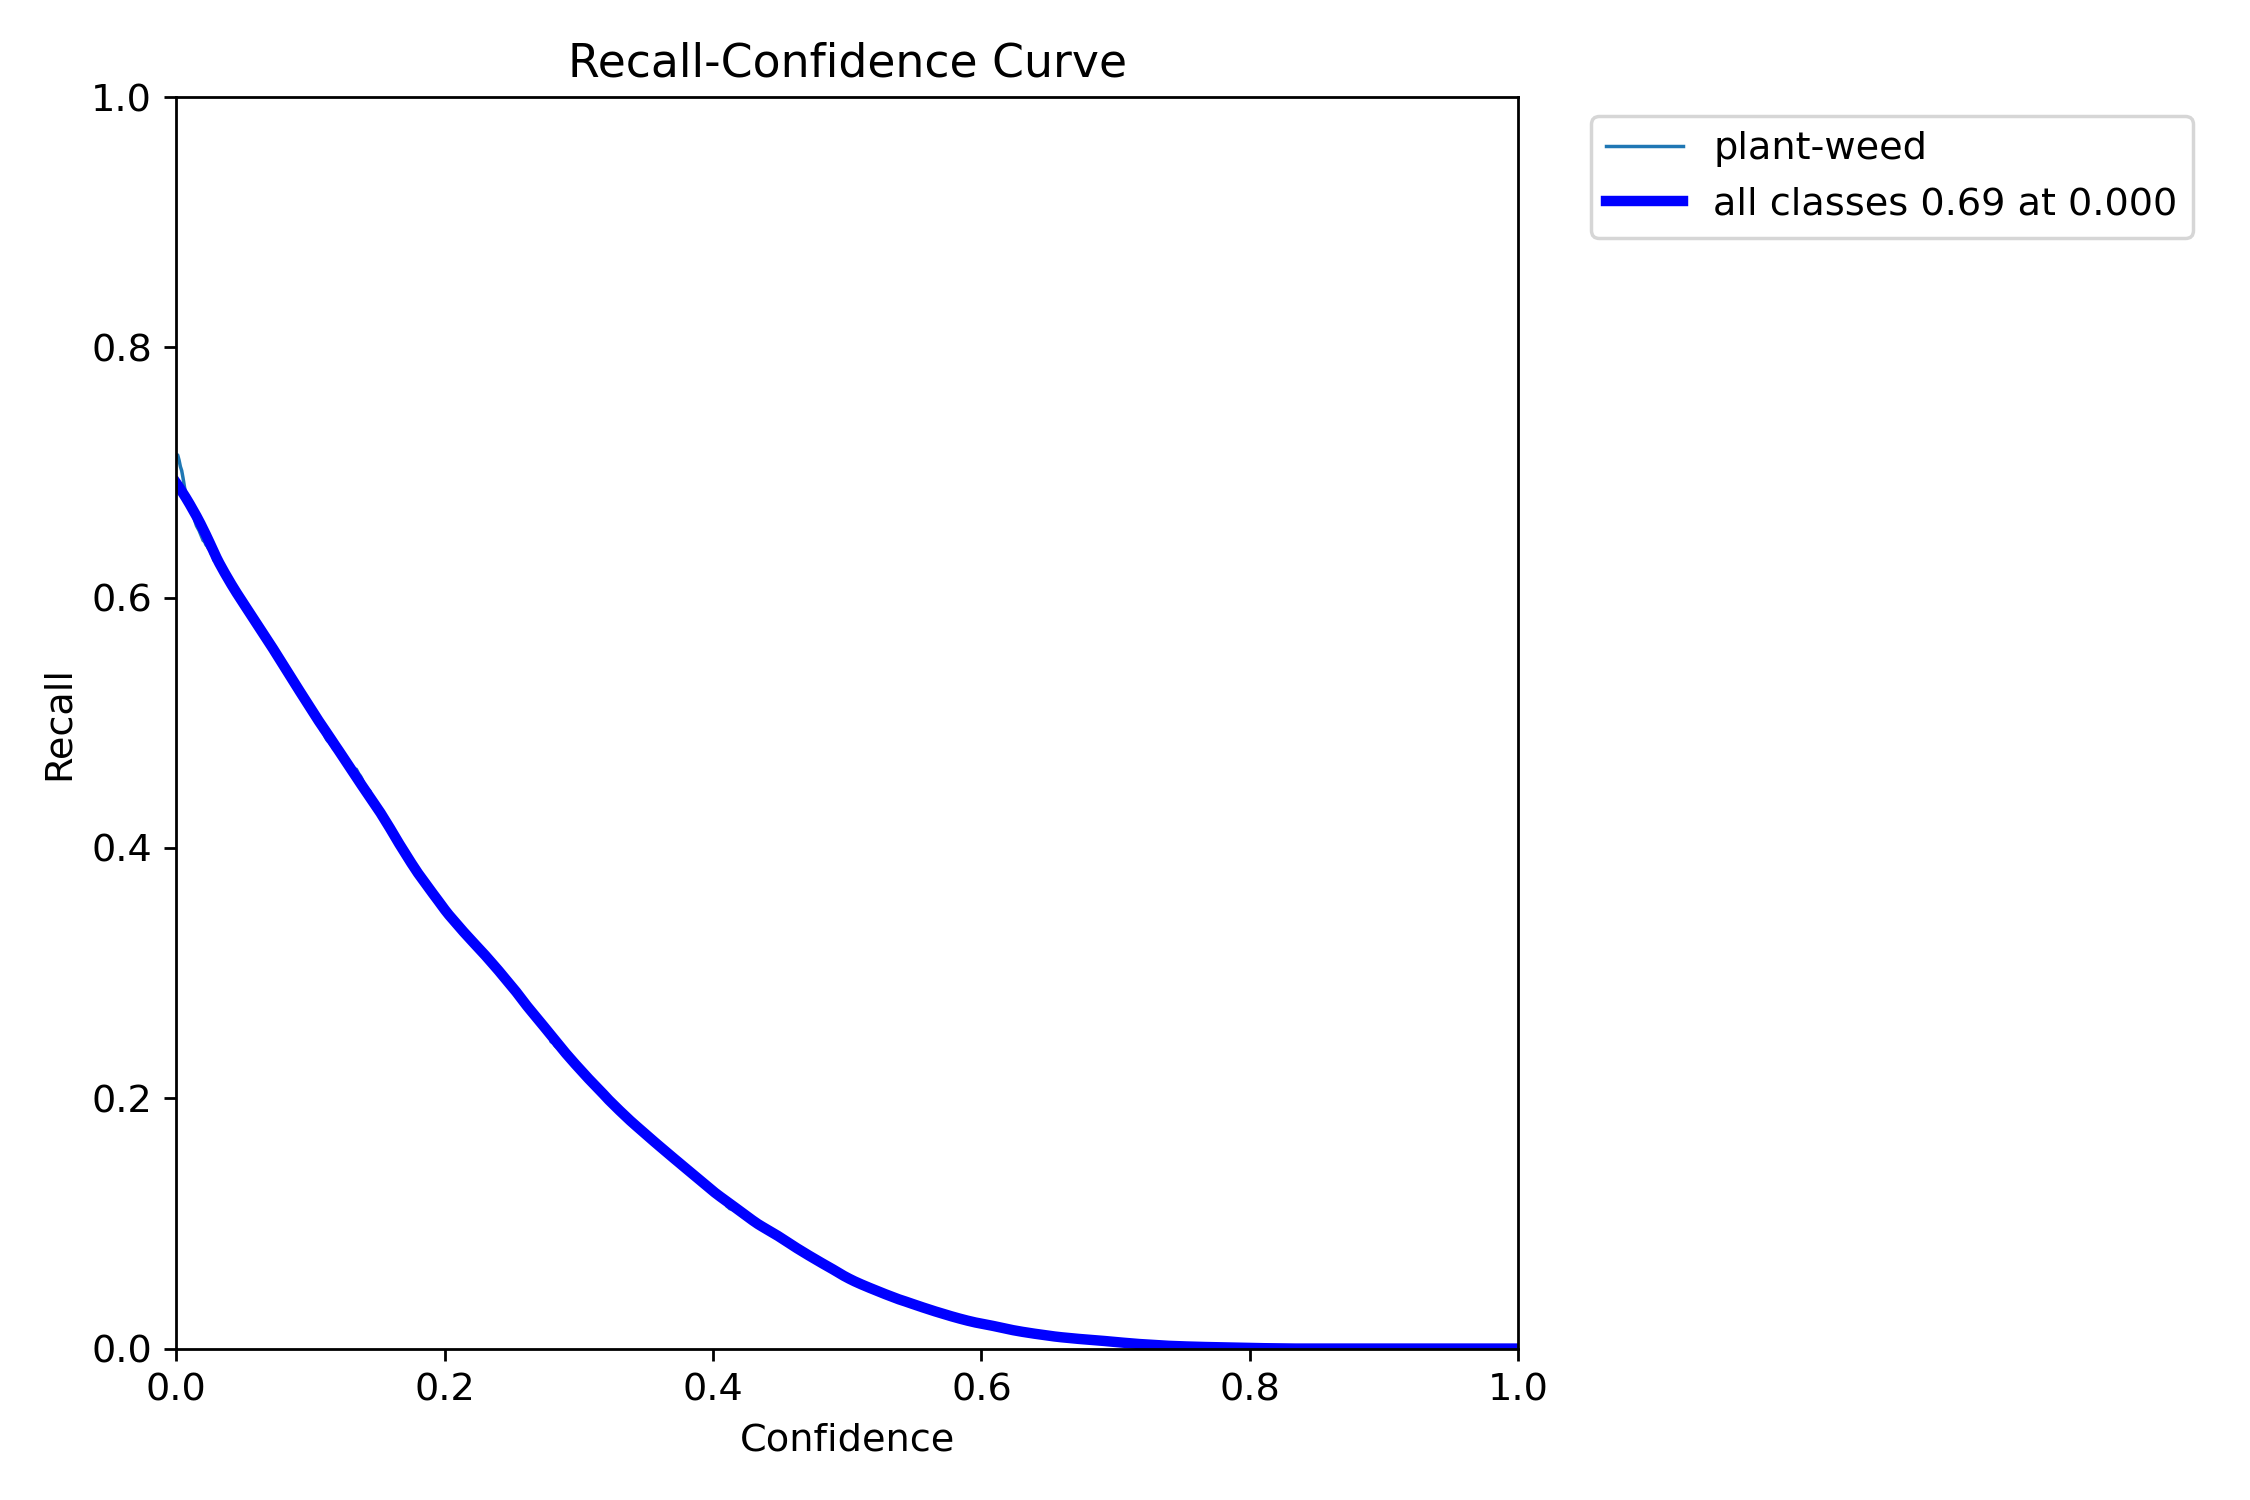

In [43]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

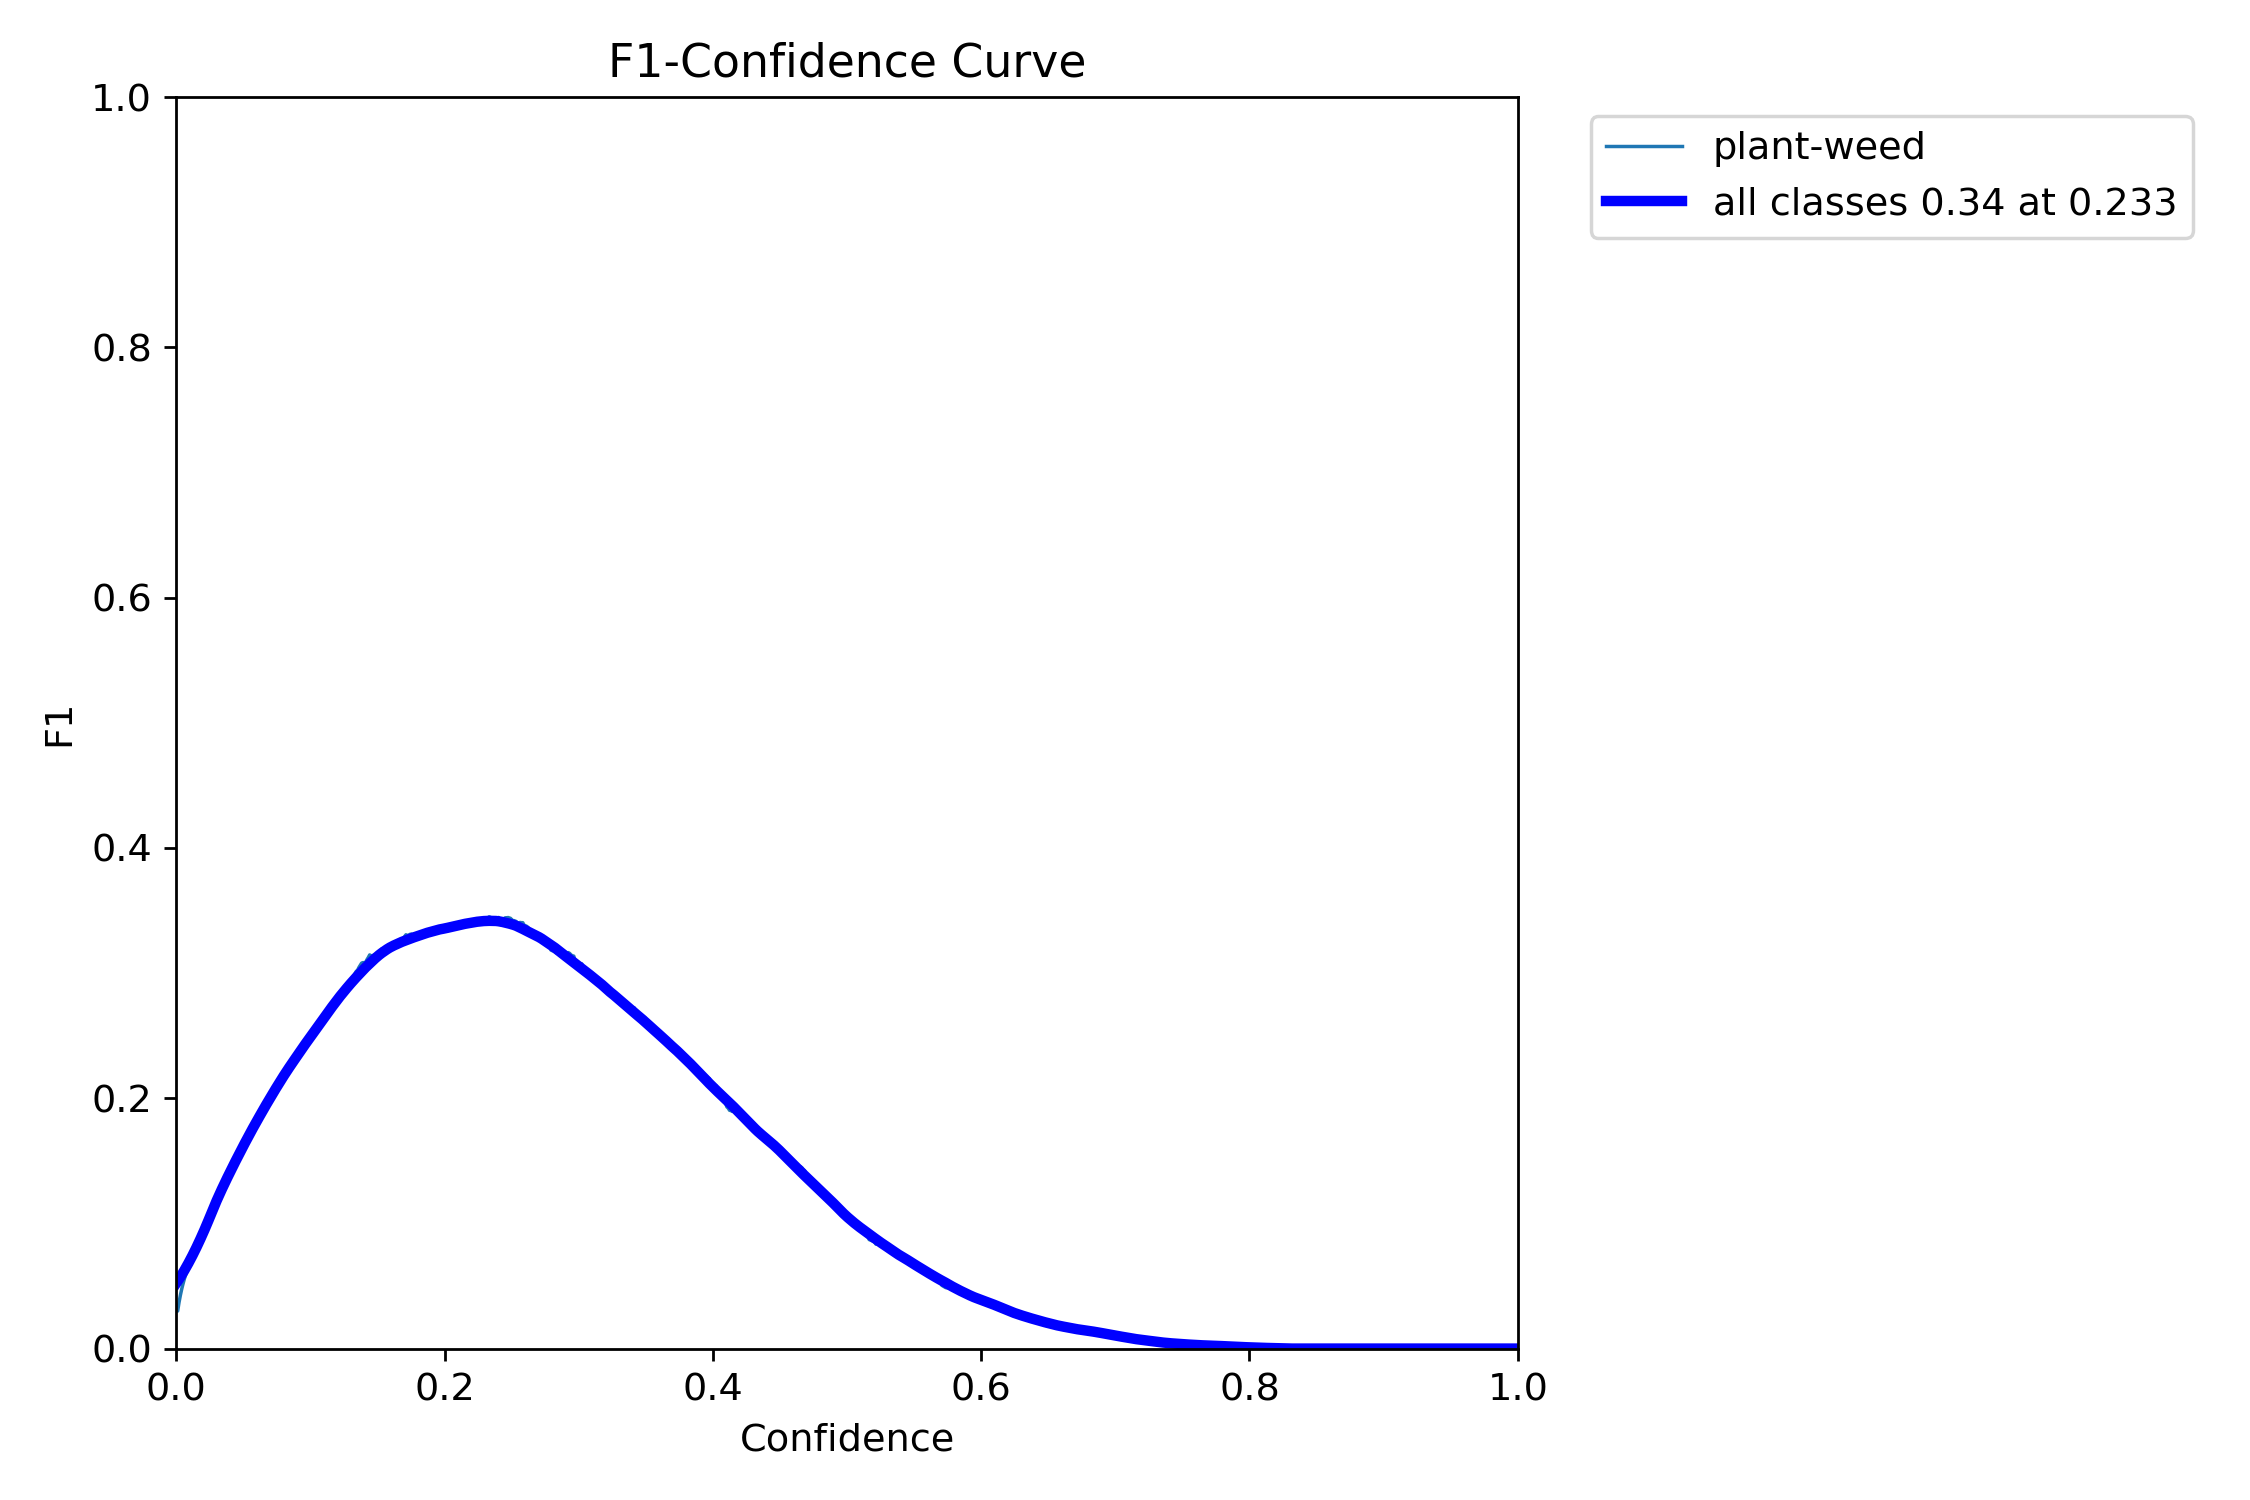

In [44]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

## Experiment 12 *(full dataset)*
### *3.5m + 5m | 60º | mid + large*

In [45]:
folder = "train3/"

In [46]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df3 = pd.read_csv(file_path)
df3.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,365.111,1.75143,1.27127,1.33133,0.41616,0.36675,0.31112,0.10607,2.43411,1.56370,1.74931,0.000119,0.000119,0.000119
96,97,369.414,1.74814,1.24333,1.31370,0.42113,0.36491,0.31377,0.10712,2.43702,1.55823,1.74691,0.000099,0.000099,0.000099
97,98,372.680,1.76302,1.24645,1.32142,0.41815,0.36879,0.32322,0.11058,2.42739,1.54375,1.73380,0.000079,0.000079,0.000079
98,99,375.940,1.77293,1.25364,1.31736,0.42100,0.37143,0.32719,0.11110,2.42786,1.54079,1.73129,0.000060,0.000060,0.000060
99,100,379.832,1.73882,1.23113,1.30294,0.42395,0.37245,0.32803,0.11076,2.42969,1.54129,1.73093,0.000040,0.000040,0.000040


In [ ]:
last_row = df3.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 379.832 sec


### Graphs

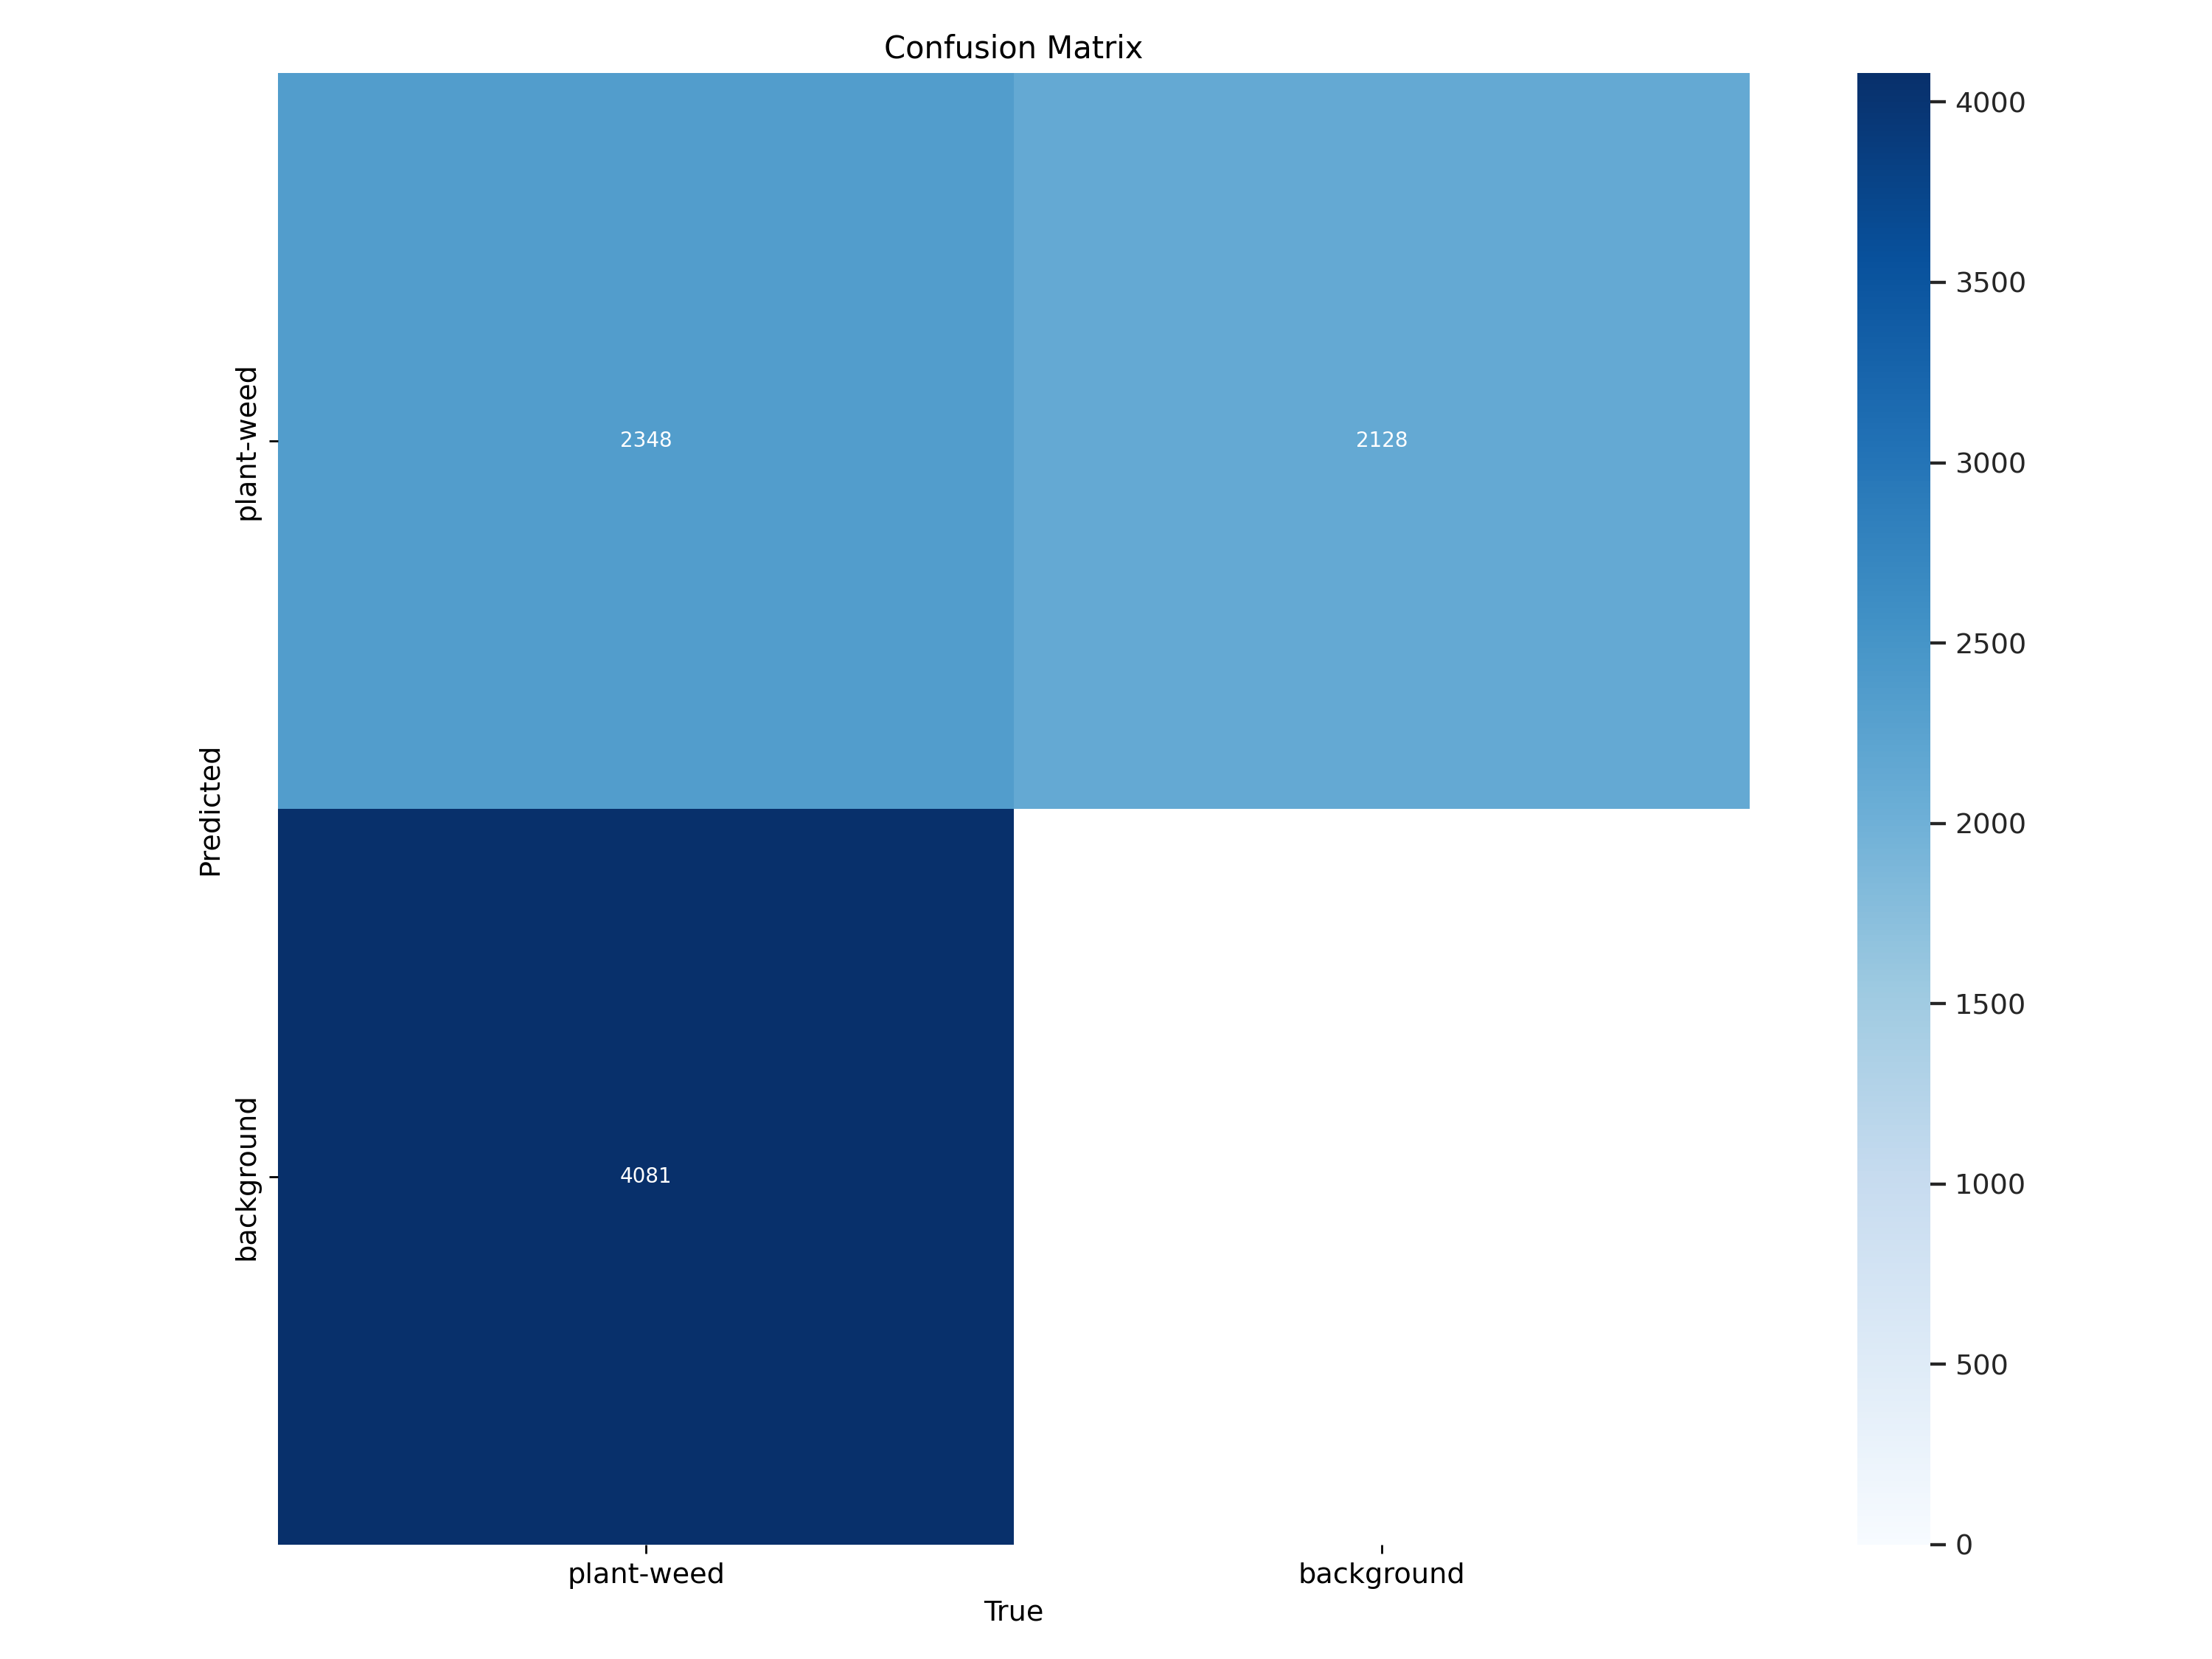

In [ ]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

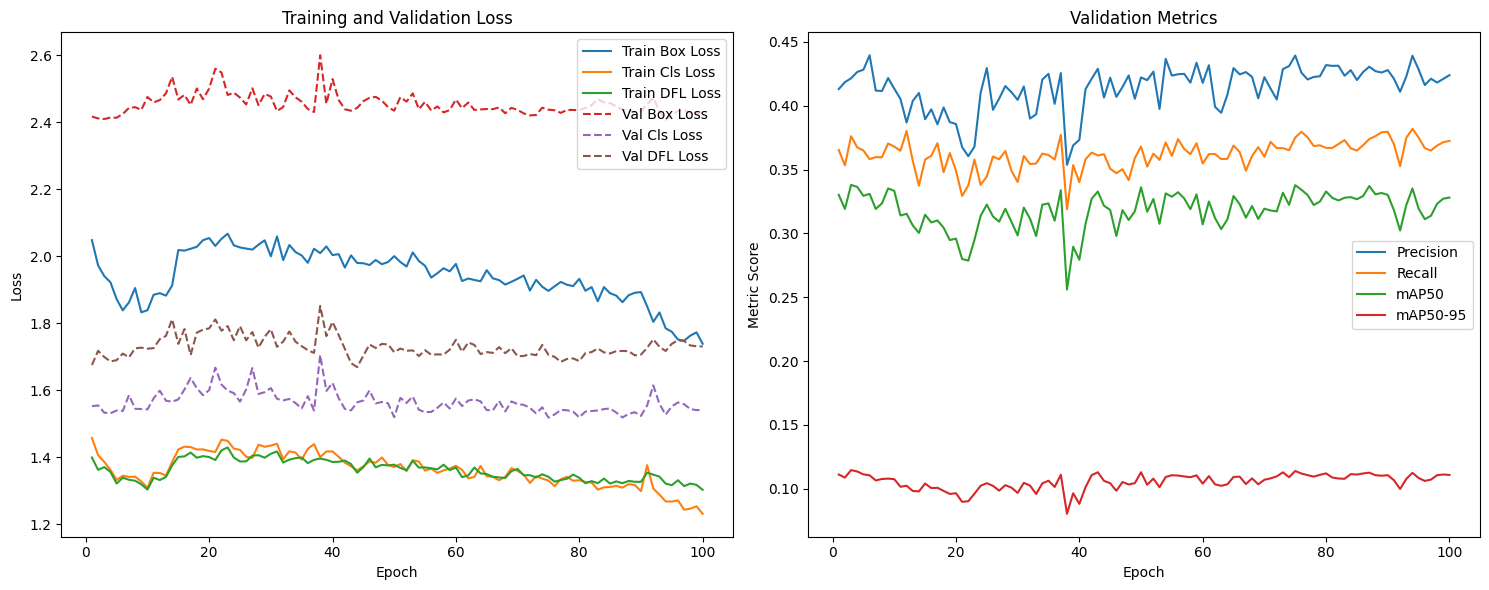

In [ ]:
graph_training_metrics(df3, graph="full")

In [49]:
graph_LrLoss_3D(df3)

Validation set


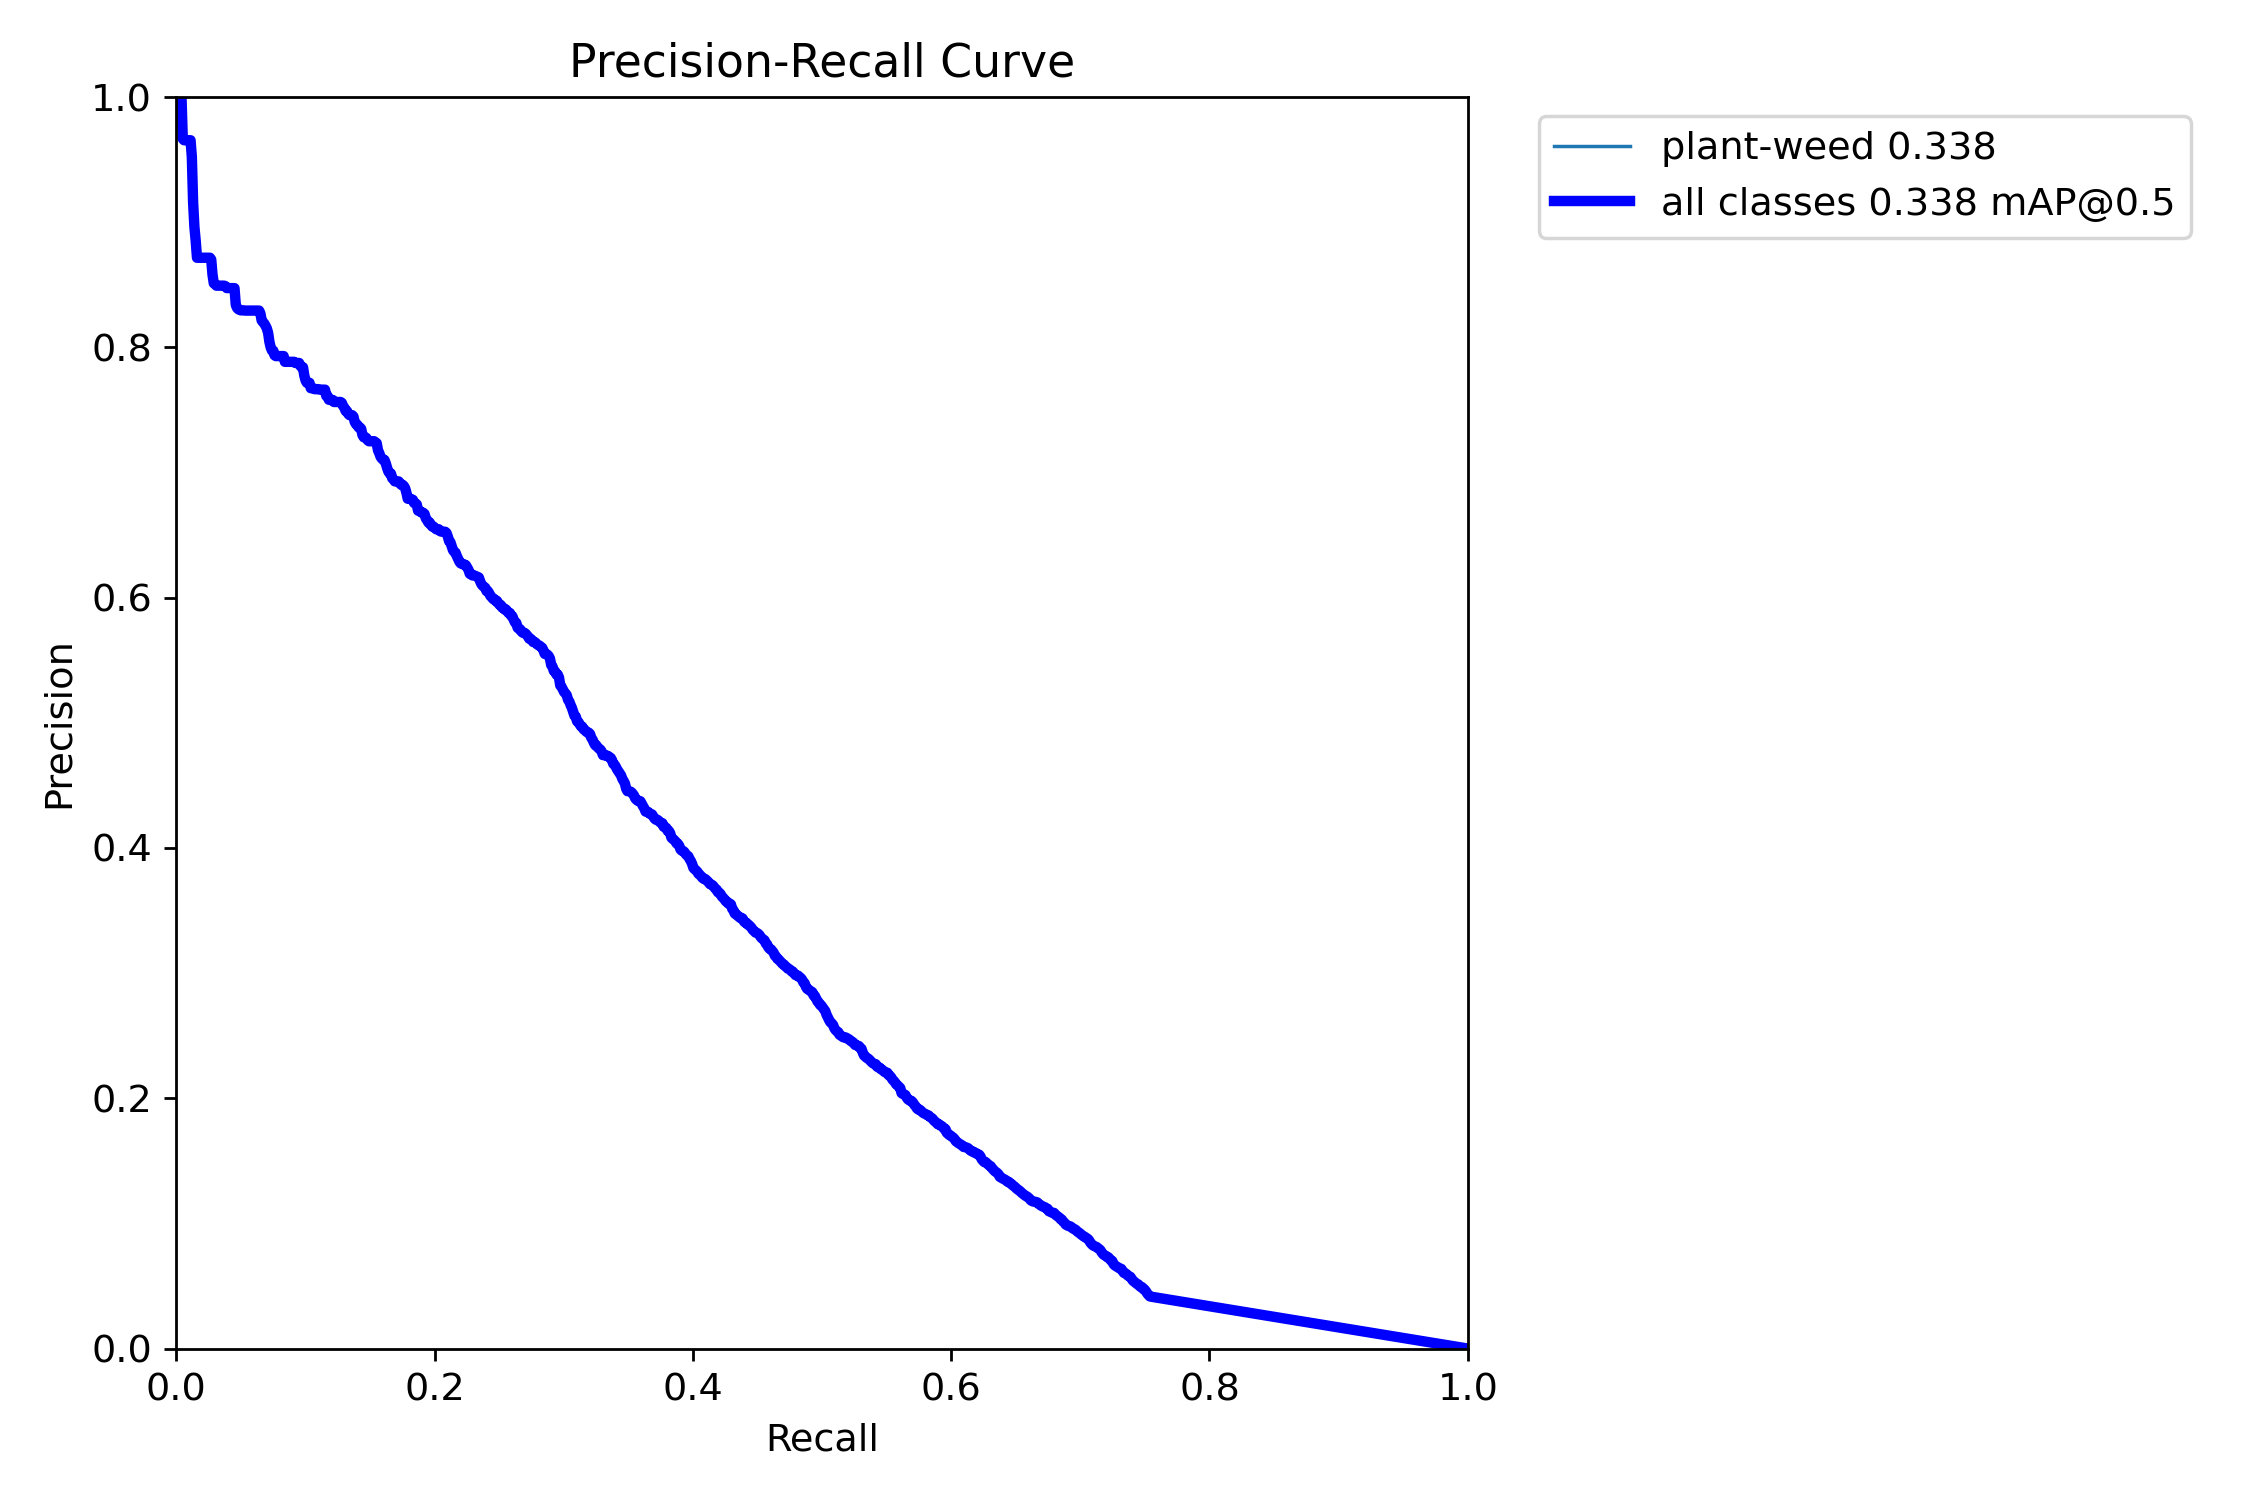

In [50]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

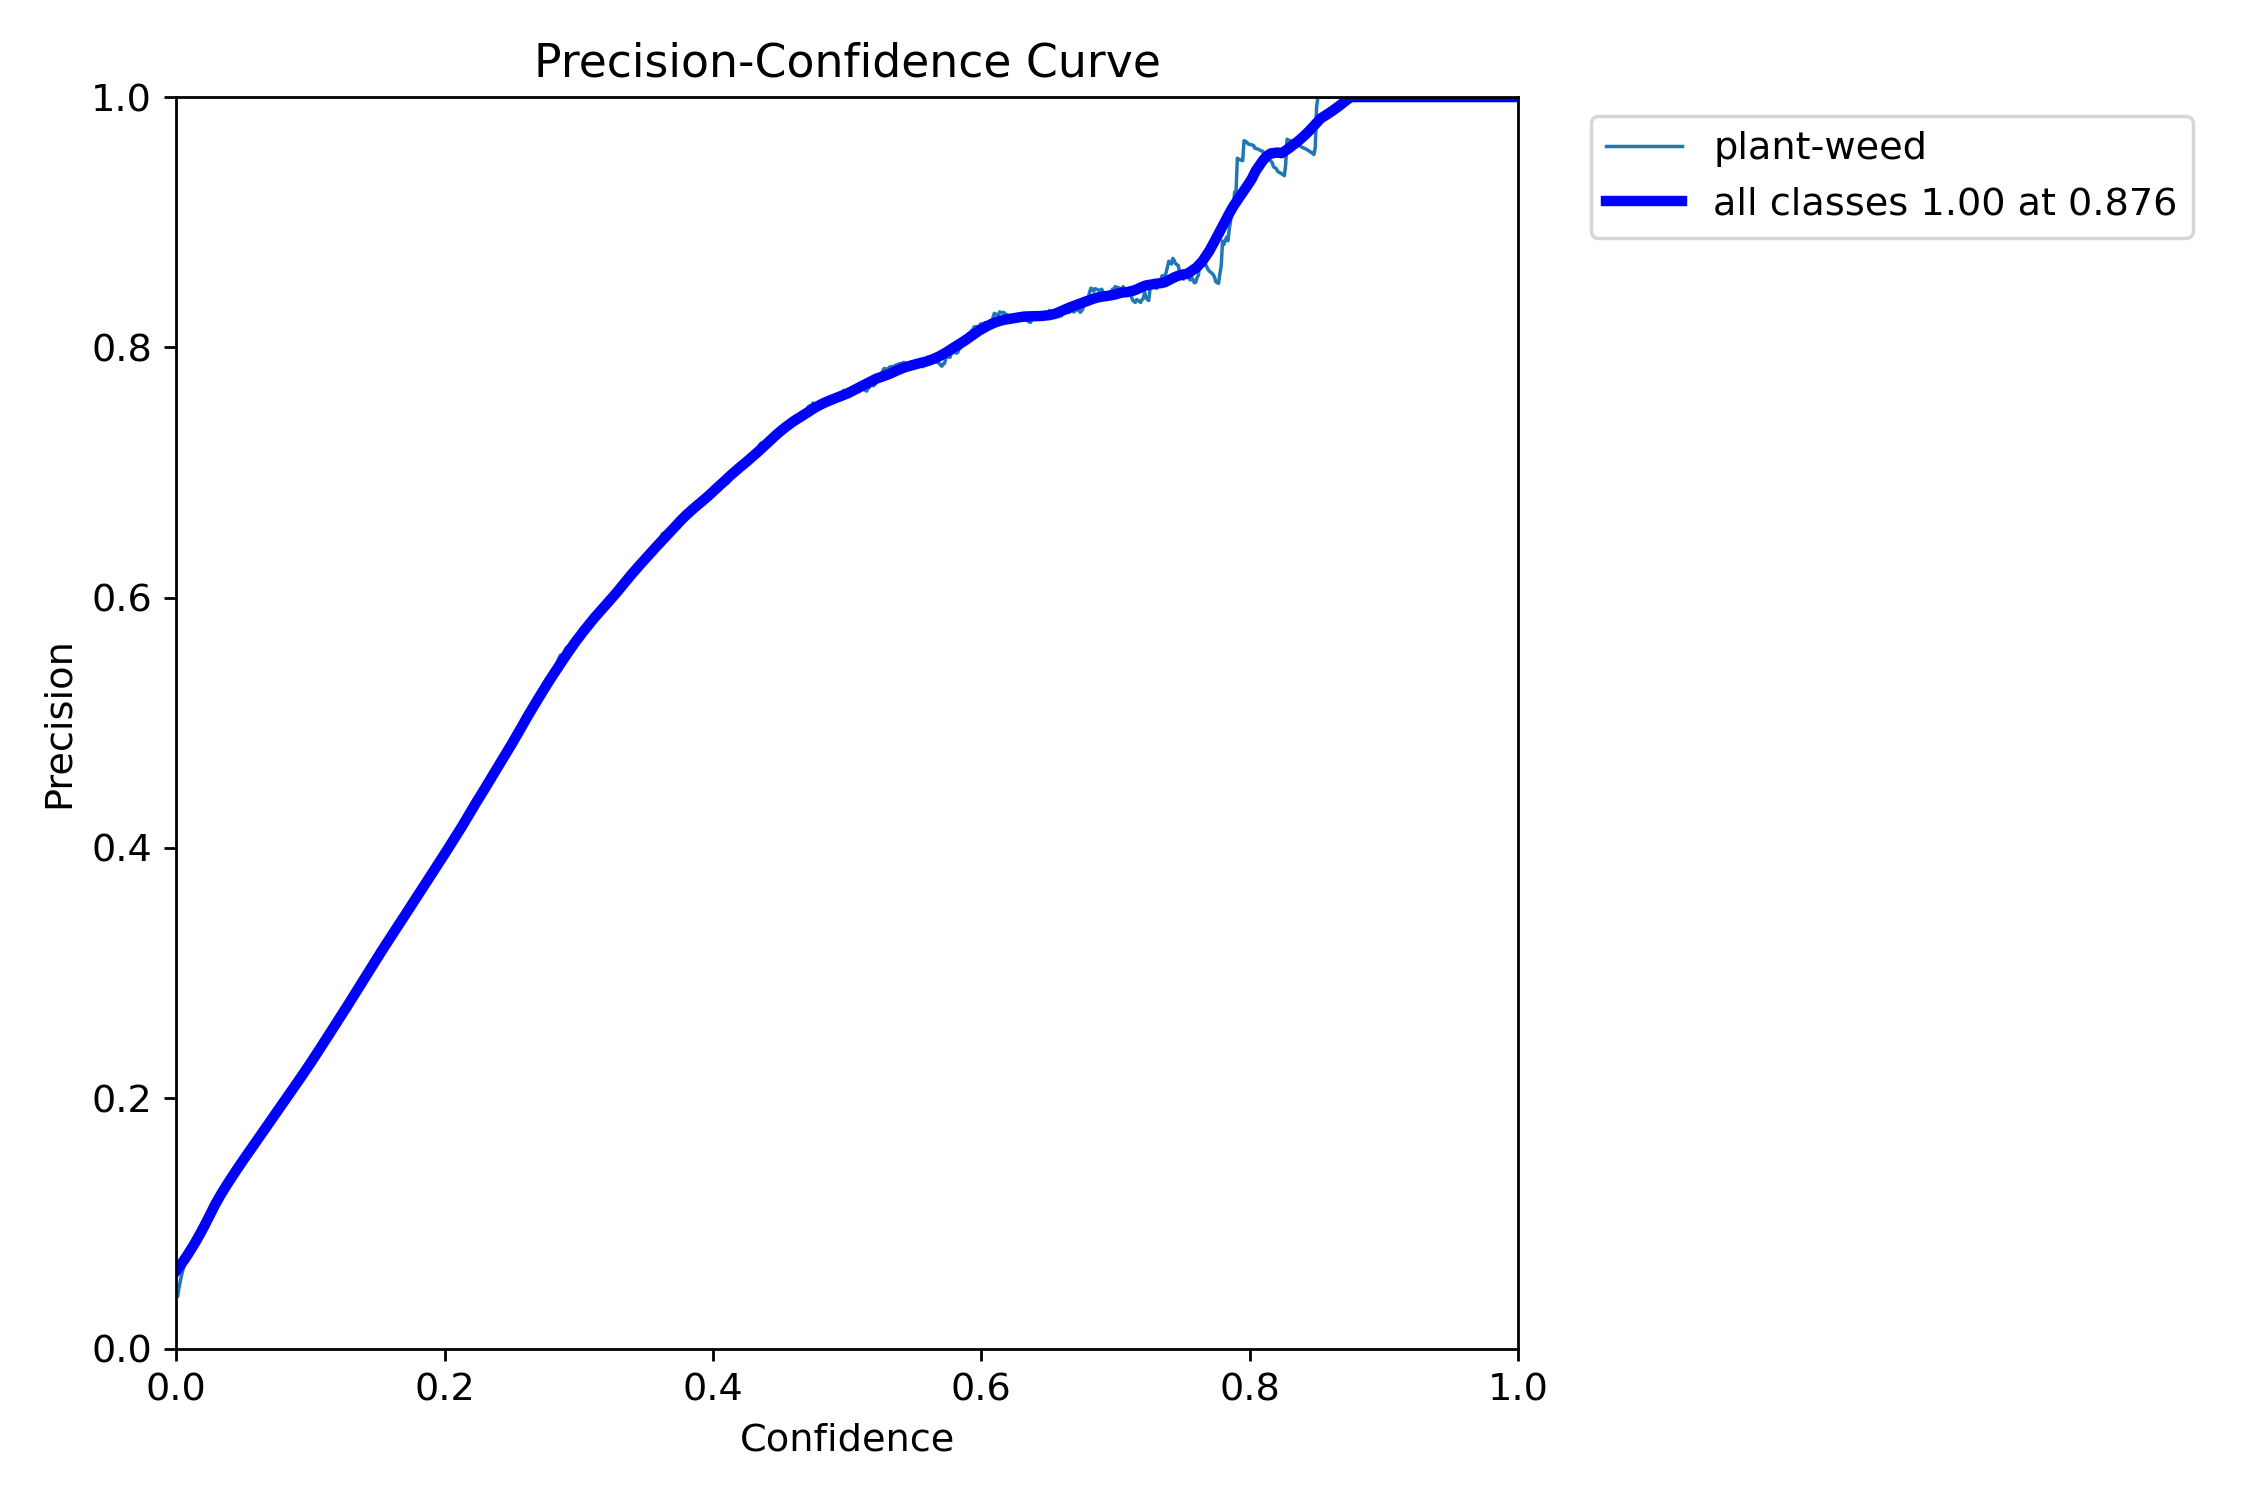

In [51]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

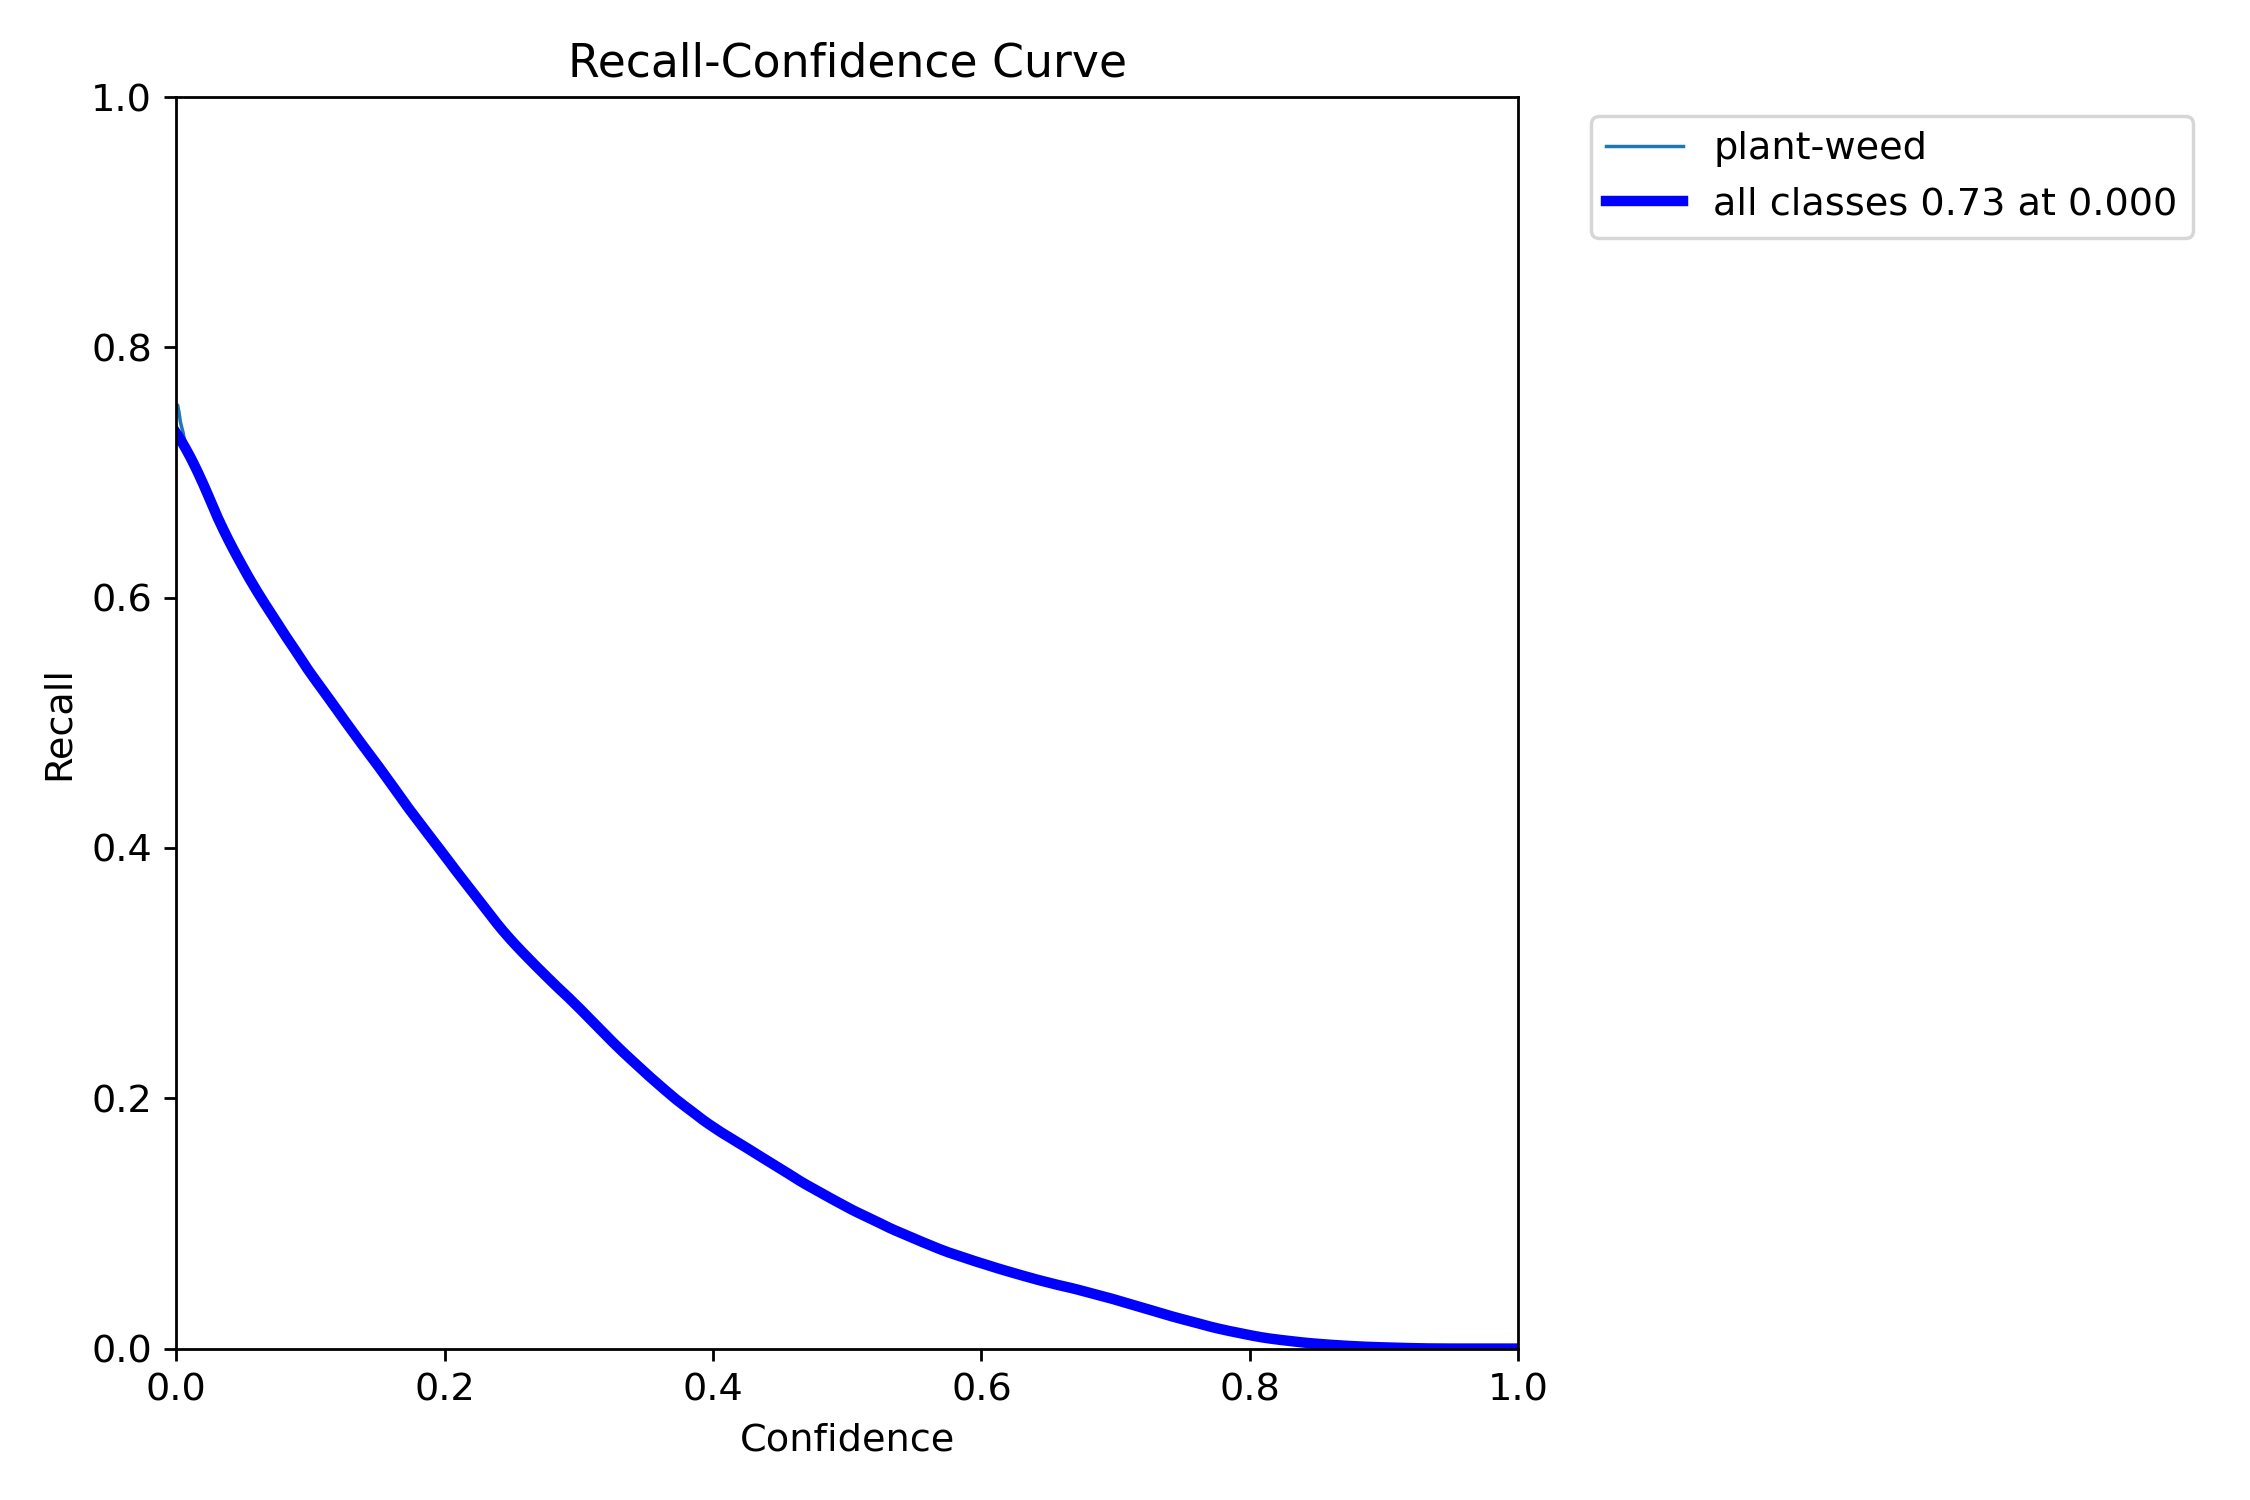

In [52]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

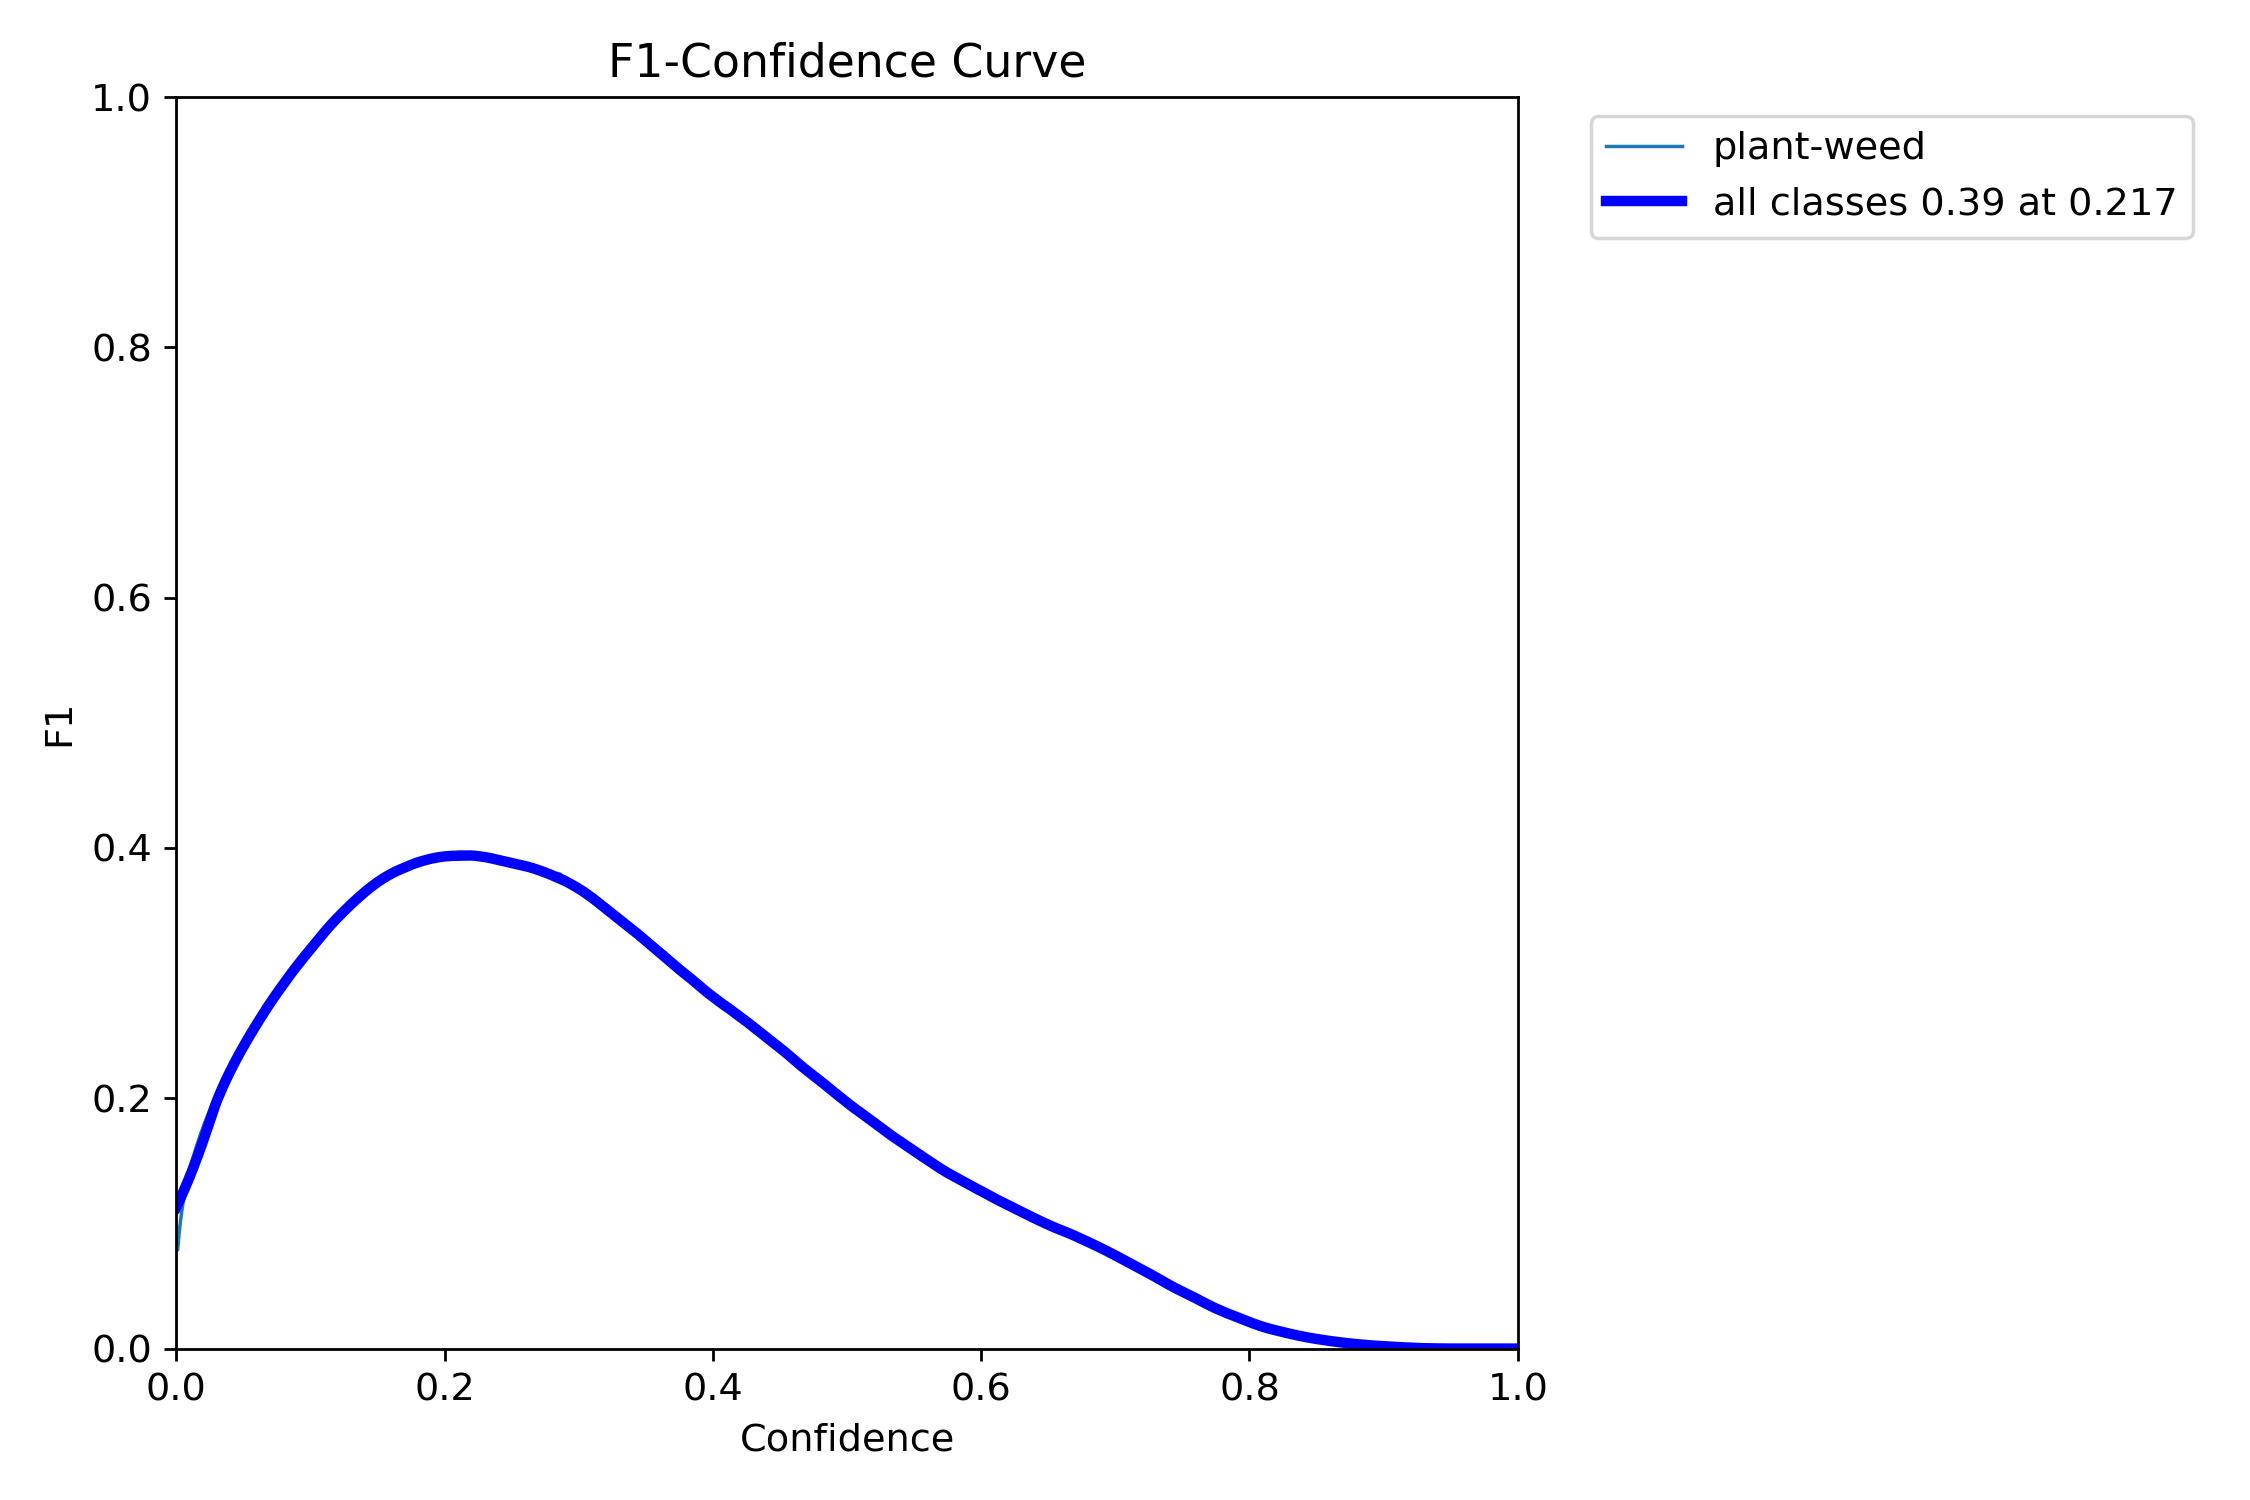

In [53]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

From the F1 curve, the confidence value that optimizes precision and recall is 0.231. In many cases a higher confidence value is desirable.

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- 

2. **Métricas de validación (Precisión, Recall, mAP)**

- 

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- 

----

# Métricas generales

## Graphs

In [ ]:
# Define function to plot metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(15, 5))
    plt.plot(df1["epoch"], df1[metric], label="Training 1", linestyle="--", marker="o", markersize=4)
    plt.plot(df2["epoch"], df2[metric], label="Training 2", linestyle="--", marker="s", markersize=4)
    plt.plot(df3["epoch"], df3[metric], label="Training 3", linestyle="--", marker="d", markersize=4)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Training and Validation Losses

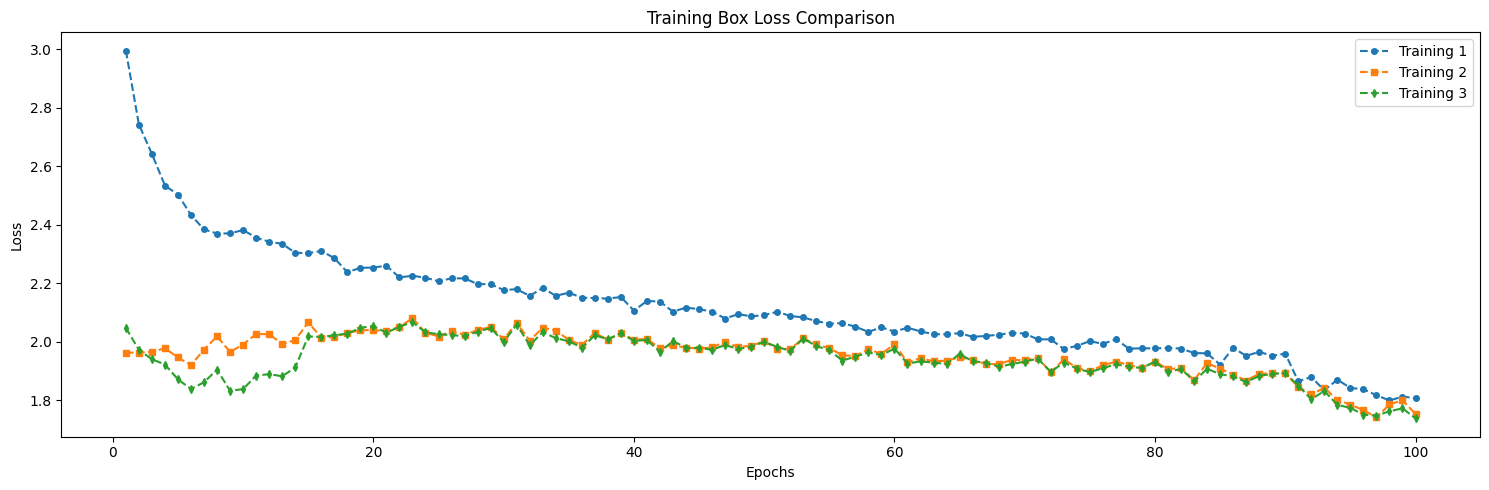

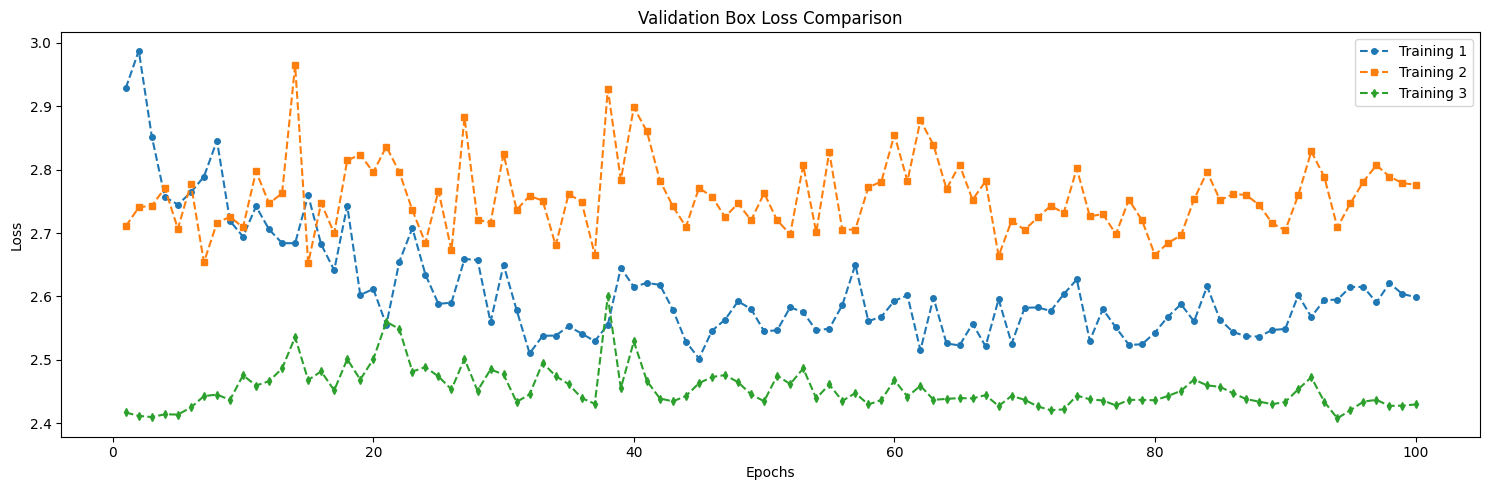

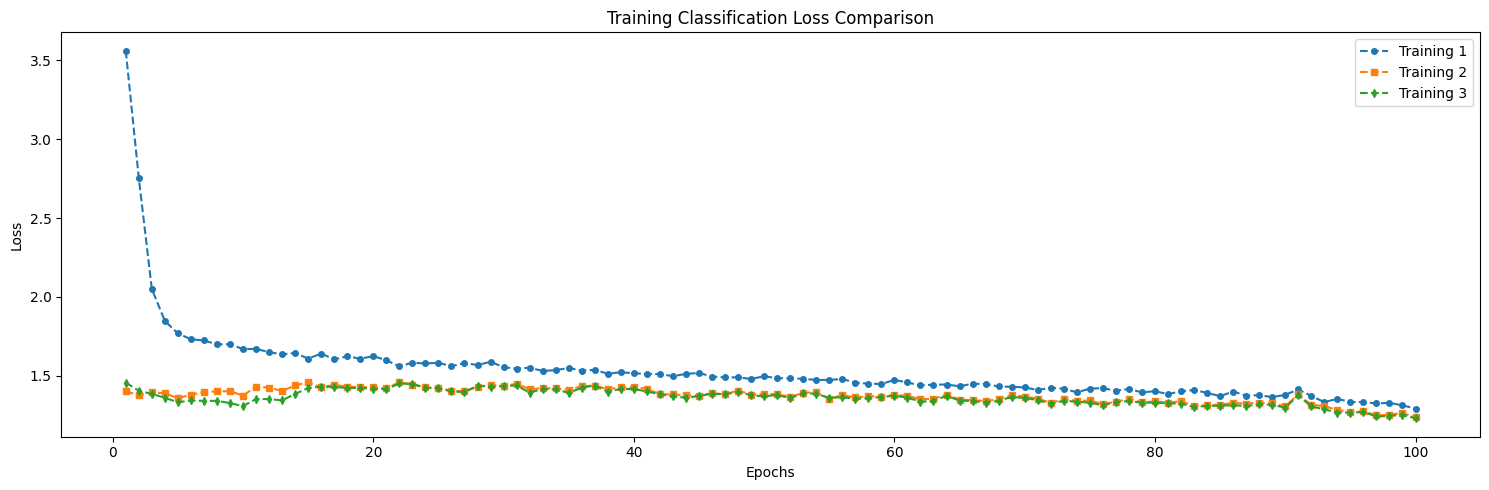

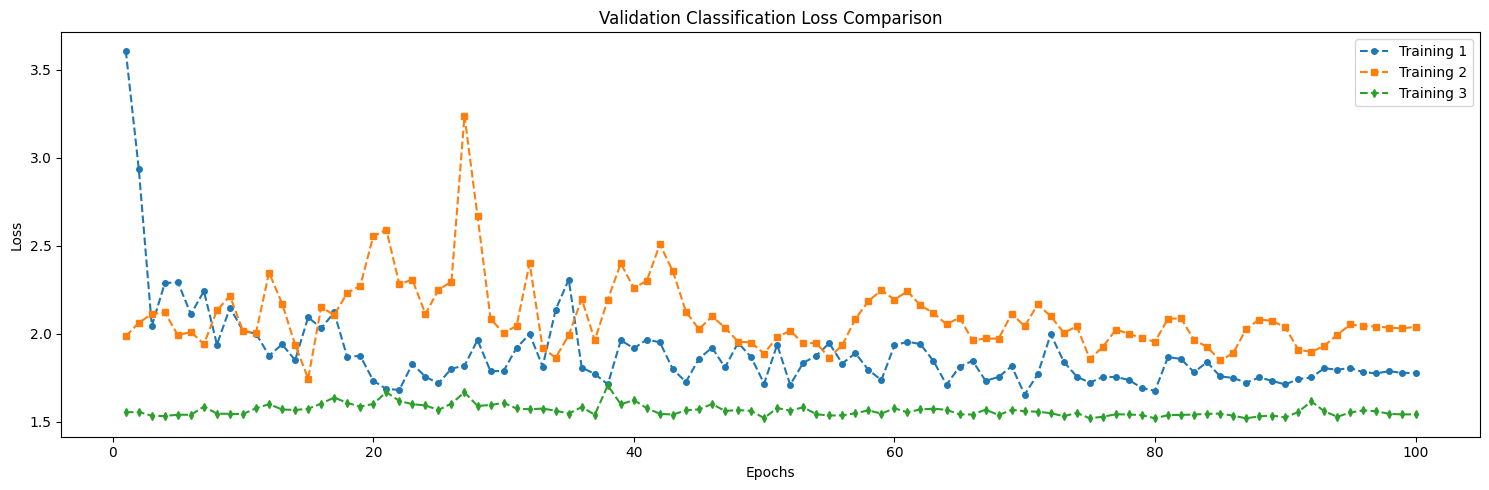

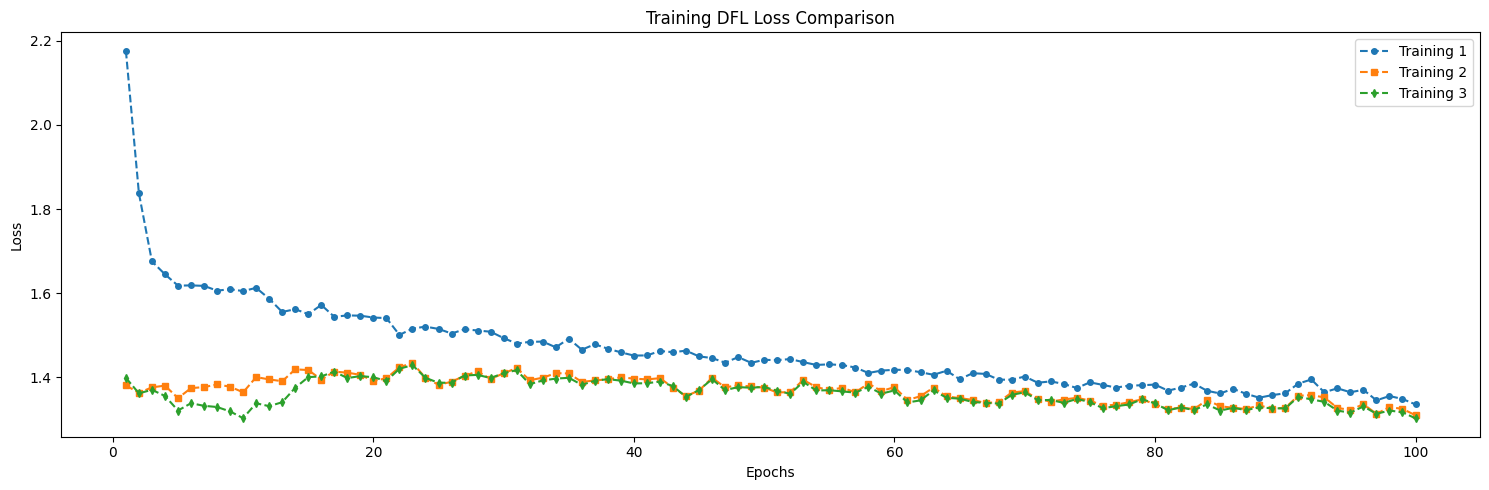

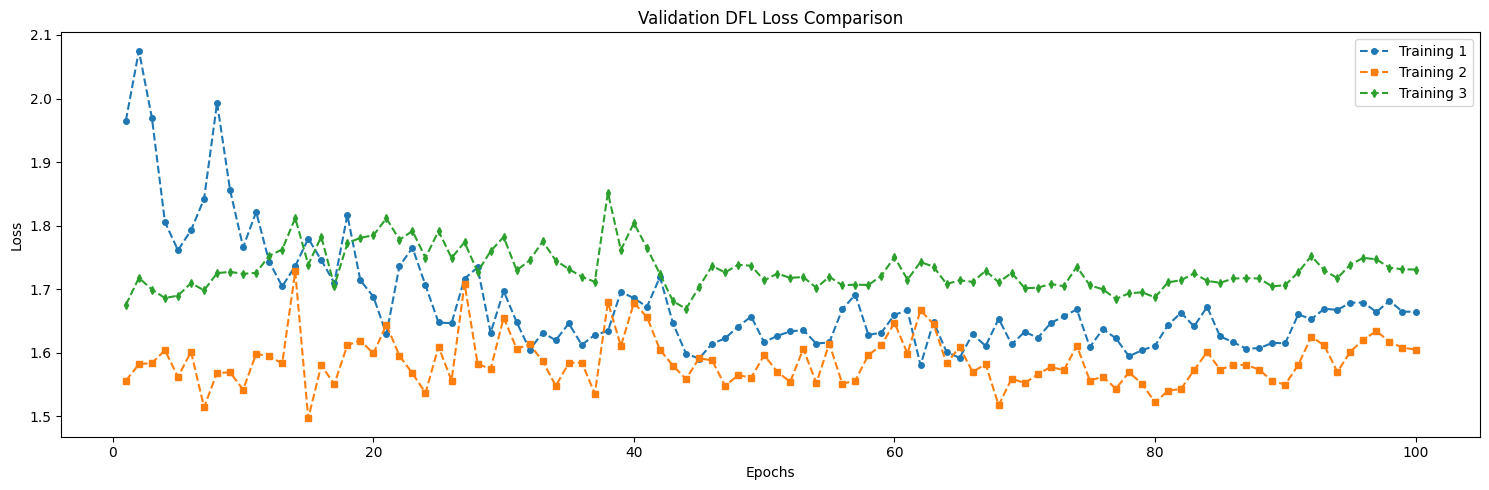

In [ ]:
# Plot Training and Validation Losses
plot_metric("train/box_loss", "Loss", "Training Box Loss Comparison")
plot_metric("val/box_loss", "Loss", "Validation Box Loss Comparison")

plot_metric("train/cls_loss", "Loss", "Training Classification Loss Comparison")
plot_metric("val/cls_loss", "Loss", "Validation Classification Loss Comparison")

plot_metric("train/dfl_loss", "Loss", "Training DFL Loss Comparison")
plot_metric("val/dfl_loss", "Loss", "Validation DFL Loss Comparison")

### Performance Metrics

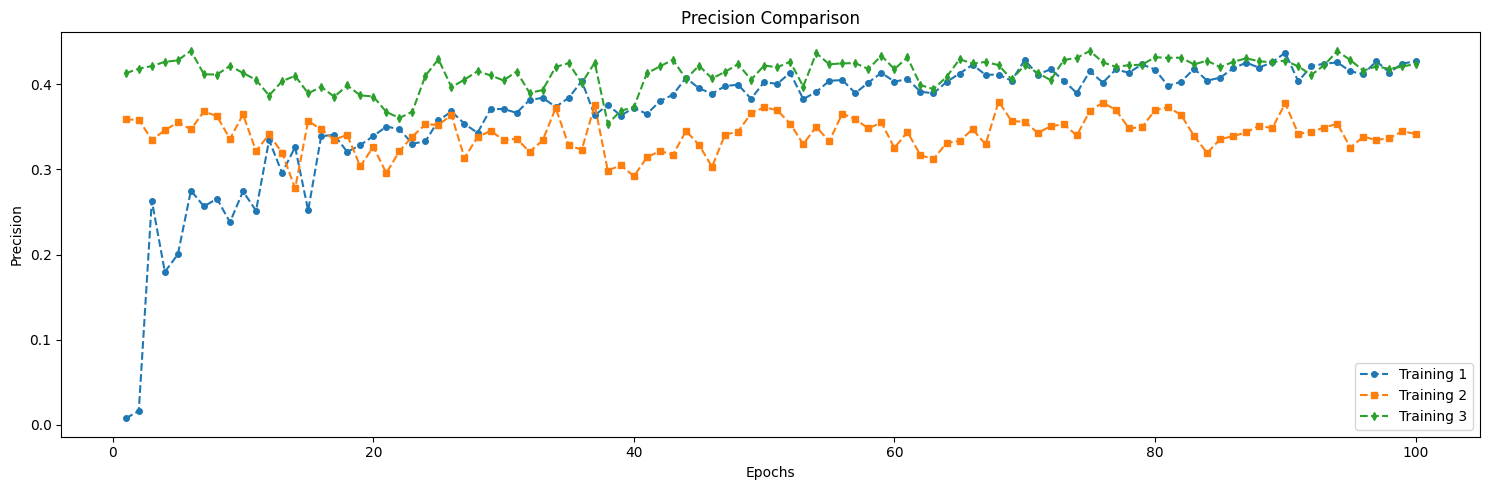

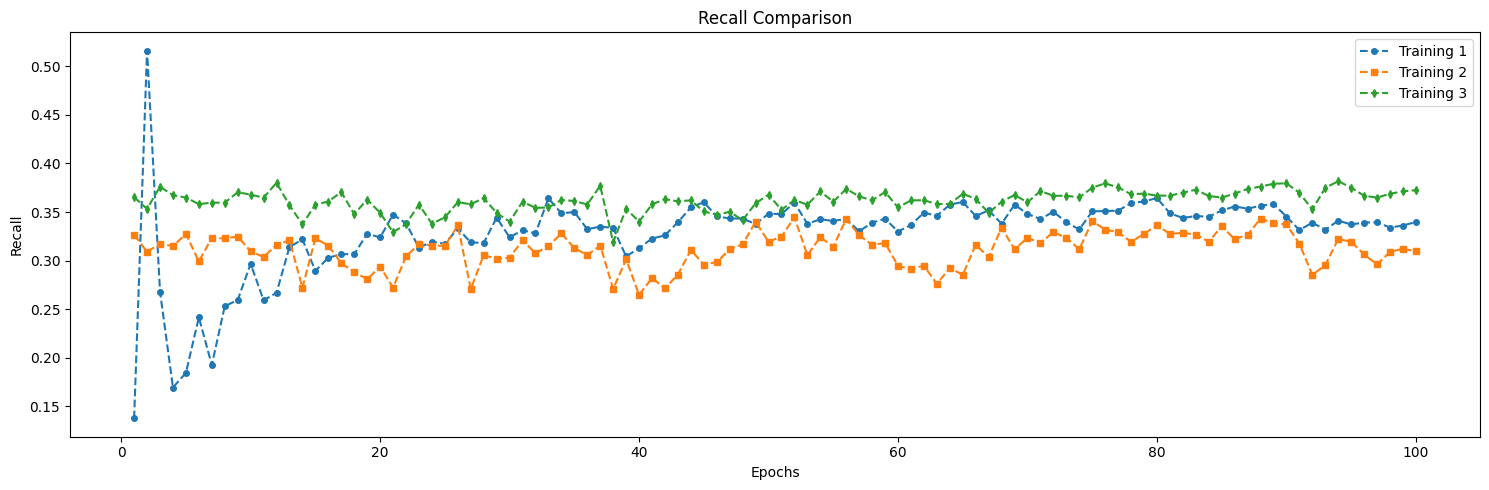

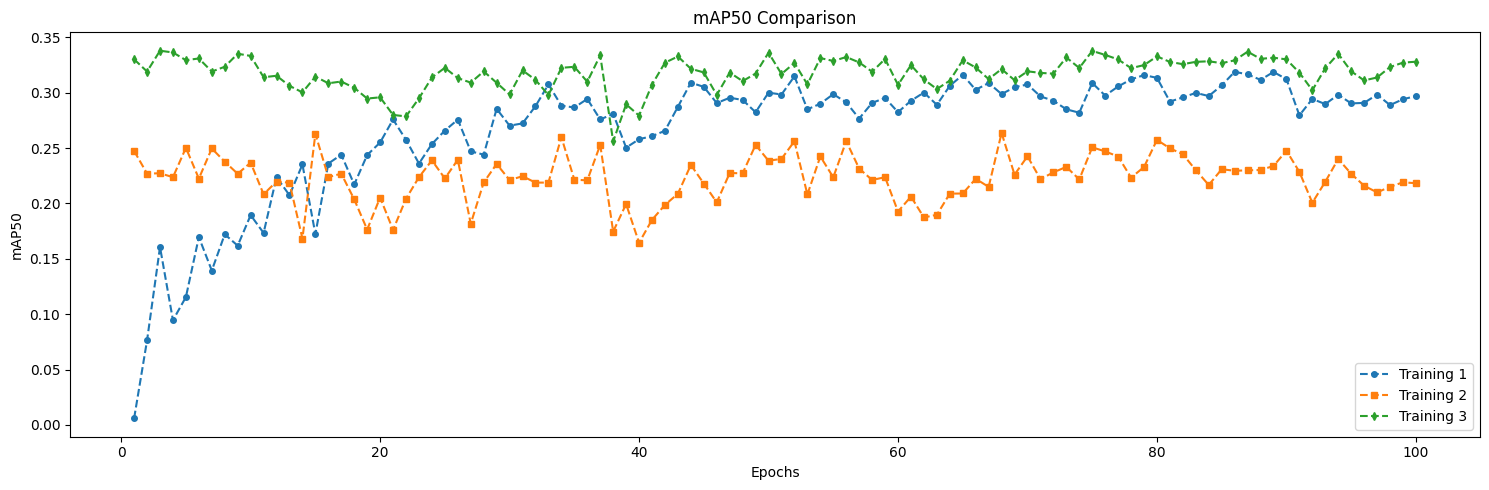

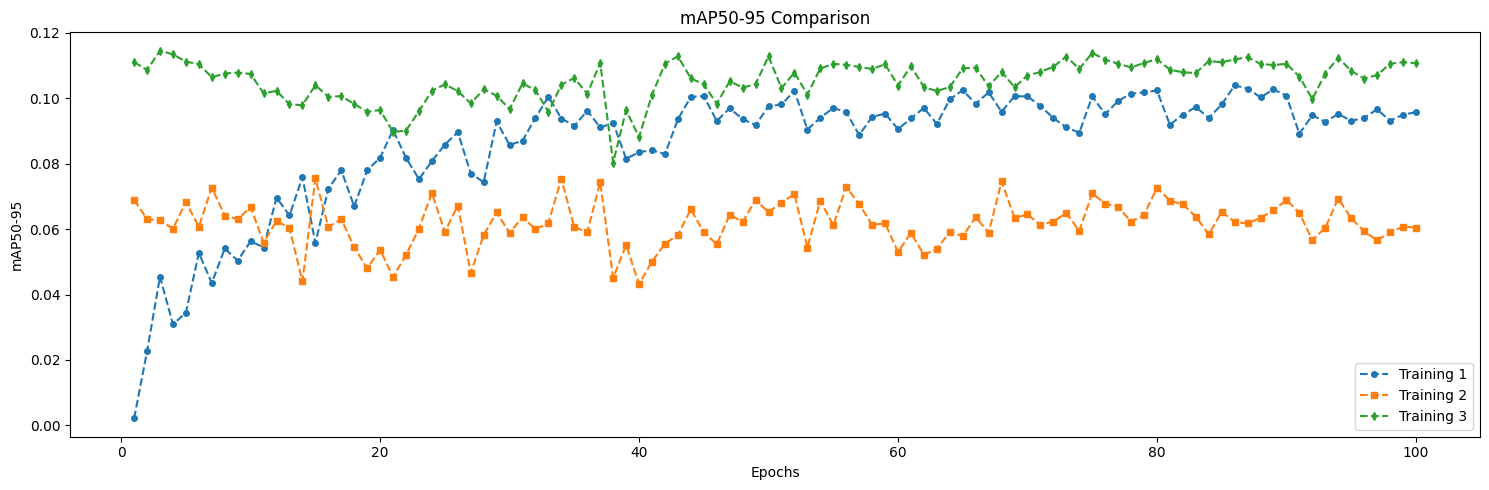

In [55]:
# Plot Performance Metrics
plot_metric("metrics/precision(B)", "Precision", "Precision Comparison")
plot_metric("metrics/recall(B)", "Recall", "Recall Comparison")
plot_metric("metrics/mAP50(B)", "mAP50", "mAP50 Comparison")
plot_metric("metrics/mAP50-95(B)", "mAP50-95", "mAP50-95 Comparison")

### Learning Rate

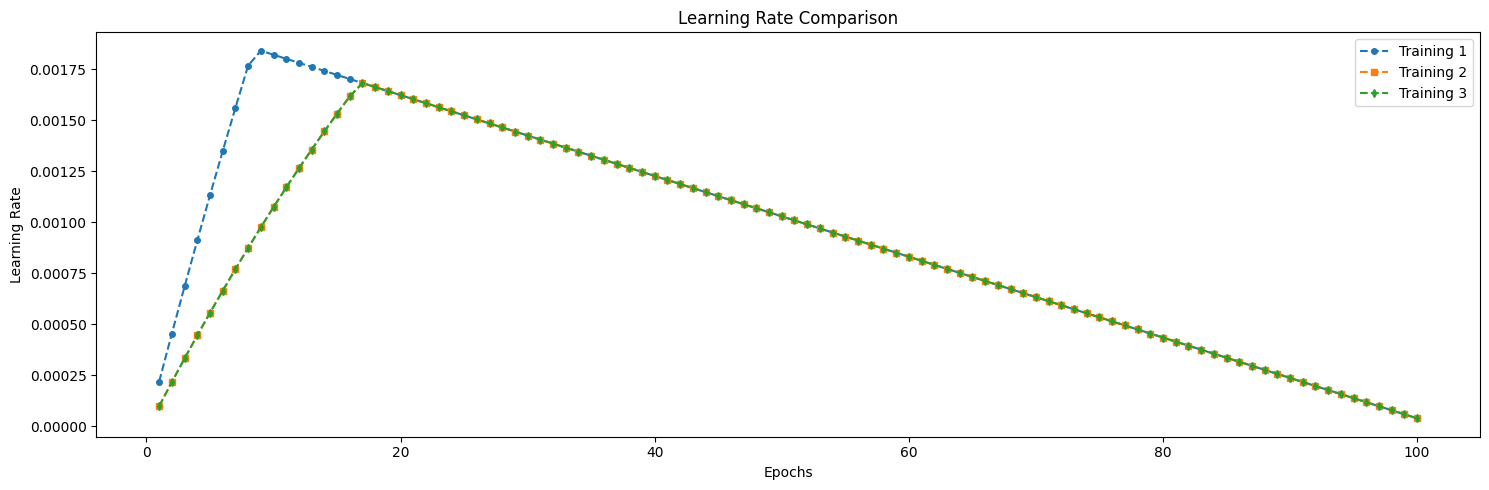

In [56]:
# Plot Learning Rate
plot_metric("lr/pg0", "Learning Rate", "Learning Rate Comparison")

## Resumen de los Experimentos

| Experimento | Train Time (min) | Inf Time (ms) | Dataset (Size) | Images | Tiles | Tags | Train/Valid (%) | True Positives | False Positives | False Negatives | mAP@0.5 |
|------------|------|------|--------------|---------|------|------|----------------|---------------|---------------|---------------|--------|
| **1º TRAIN** |   |   | Small & Mid | 4 | 1472 |   | 50% / 50% |   ( %) |   ( %) |   ( %) | **0** |
| **2º TRAIN** |   |   | Small | 2 | 736 |   | 50% / 50%|   ( %) |   ( %) |   ( %) | **0** |
| **3º TRAIN** |   |   | Mid | 2 | 736 |   | 50% / 50% |   ( %) |   ( %) |   ( %) | **0** |

## Comparación de los Entrenamientos y Conclusiones

### **Análisis del Dataset**
1. **Cantidad de imágenes y etiquetas**:  
  -  

2. **Distribución de Train/Valid**:  
  -  

3. **Tamaño de imágenes (small vs mid)**:  
  -  

### **Análisis de los Hiperparámetros**
- **Modelo (yolov8n)**: Se mantuvo constante en todos los entrenamientos, lo que permite una comparación justa.  
- **Epochs (100)**: En los tres experimentos, el modelo parece alcanzar su rendimiento máximo antes de completar todas las épocas, lo que podría indicar que no se necesita entrenar tantas iteraciones.  
- **Batch Size (64)**: Se mantiene igual en todos los experimentos.  
- **Freeze (10)**: Congelar los primeros 10 capas del modelo en los tres entrenamientos podría estar limitando la capacidad de ajuste en las primeras etapas.  

### **Análisis de Resultados**
#### **Métricas Generales**
1. **Precisión (Precision) y Recall**:  
  -  

2. **mAP50**:  
  - 
  
3. **Confusión entre clases (False Positives y False Negatives)**:  
  - 
  
### **Conclusiones Generales**
1. 

# Conclusión Final


## Estrategias para Próximos Entrenamientos
1. **Dataset**
- 

2. **Hiperparámetros**
-  

3. **Optimización del Modelo**
- 

4. **Evaluación y Métricas**
-  